# Chicago Airbnb Data Analysis

## Data

Source: Inside Airbnb https://insideairbnb.com/
last Update: 21/06/24

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pathlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Understand the data

#### Listings Summary csv
I will use this csv as main dataset

In [2]:
dataset = pd.read_csv('data/listings_summary_train.csv')
y_train = dataset['price']
X_train = dataset.drop(['price'], axis=1)

X_test = pd.read_csv('data/listings_summary_test.csv')


In [3]:
dataset.shape

(7952, 18)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7952 non-null   int64  
 1   name                            7952 non-null   object 
 2   host_id                         7952 non-null   int64  
 3   host_name                       7952 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7952 non-null   object 
 6   latitude                        7952 non-null   float64
 7   longitude                       7952 non-null   float64
 8   room_type                       7952 non-null   object 
 9   price                           7598 non-null   float64
 10  minimum_nights                  7952 non-null   int64  
 11  number_of_reviews               7952 non-null   int64  
 12  last_review                     65

In [5]:
dataset.isnull().mean()*100

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               4.451710
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        18.221831
reviews_per_month                  18.221831
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                            19.303320
dtype: float64

In [6]:
dataset.duplicated().sum()


0

In [7]:
dataset['price'].describe()

count    7598.000000
mean      225.515399
std       245.570005
min        13.000000
25%       100.000000
50%       166.000000
75%       266.000000
max      5120.000000
Name: price, dtype: float64

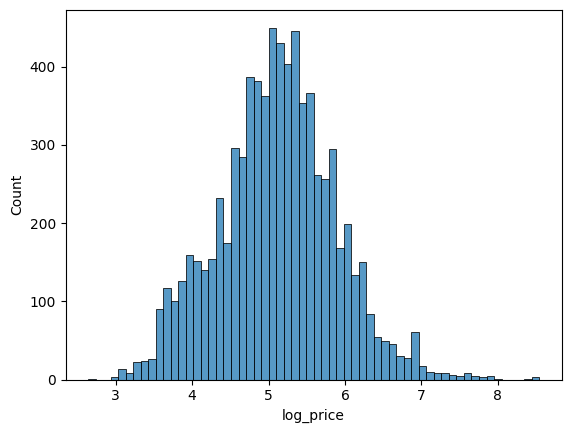

In [8]:
dataset['log_price'] = np.log1p(dataset['price'])  # log1p para incluir 0
sns.histplot(dataset['log_price'])
plt.show()


#### Listings csv

In [9]:
listings = pd.read_csv('data/listings.csv')
listings.head()


id                                       listing_url  \
0             16757056             https://www.airbnb.com/rooms/16757056   
1             48112045             https://www.airbnb.com/rooms/48112045   
2  1089958767588000931  https://www.airbnb.com/rooms/1089958767588000931   
3             24694181             https://www.airbnb.com/rooms/24694181   
4   639920368906600737   https://www.airbnb.com/rooms/639920368906600737   

        scrape_id last_scraped       source  \
0  20240621025845   2024-06-21  city scrape   
1  20240621025845   2024-06-21  city scrape   
2  20240621025845   2024-06-21  city scrape   
3  20240621025845   2024-06-21  city scrape   
4  20240621025845   2024-06-21  city scrape   

                                                name  \
0                     Heart of Chicago 2BD + Parking   
1  West Town Chicago Apt near Metra and United Ce...   
2                    Nice 2bd 1ba w/ gated entrance!   
3                                         Talman Ave   
4      Historic brownstone in the heart of Old Town!   

                                         description  \
0  Comfortably fits 5. Two private bedrooms and a...   
1  Welcome to your dream vacation in a recently r...   
2  Great 2bd 1ba with a gated entrance less than ...   
3  The unit has four rooms available to the guest...   
4  You will be close to everything when you stay ...   

                               neighborhood_overview  \
0  Pilsen is a very family oriented neighborhood ...   
1  Located in West Town/Ukrainian Village, Super ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/bedab4f0-0e4e...   32137398  ...   
1  https://a0.muscache.com/pictures/391a5e70-1adb...   17251828  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...  487981983  ...   
3  https://a0.muscache.com/pictures/ce3da2d6-3fd1...   15721250  ...   
4  https://a0.muscache.com/pictures/3f5fe48b-9aac...   37736852  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.95                   4.65                4.85   
1                        4.76                   4.77                4.51   
2                        5.00                   5.00                5.00   
3                        4.95                   4.88                4.88   
4                        5.00                   5.00                4.67   

        license instant_bookable calculated_host_listings_count  \
0  R23000097172                f                              1   
1  R21000061412                f                              1   
2  R22000093747                t                              6   
3  R19000042335                f                              1   
4  R22000087331                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           6   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.41  
1                                           0              1.74  
2                                           0              0.31  
3                                           0              0.58  
4                                           0     

In [10]:
print(listings.shape)
print(listings.info())
print(listings.duplicated().sum())

(7952, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7952 non-null   int64  
 1   listing_url                                   7952 non-null   object 
 2   scrape_id                                     7952 non-null   int64  
 3   last_scraped                                  7952 non-null   object 
 4   source                                        7952 non-null   object 
 5   name                                          7952 non-null   object 
 6   description                                   7748 non-null   object 
 7   neighborhood_overview                         5392 non-null   object 
 8   picture_url                                   7952 non-null   object 
 9   host_id                                       7952 n

In [11]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Near North Side    913
West Town          741
Lake View          592
Near West Side     533
Logan Square       465
                  ... 
Fuller Park          3
Edison Park          2
Mount Greenwood      2
Avalon Park          2
Riverdale            1
Name: count, Length: 77, dtype: int64

In [12]:
pd.set_option('display.max_rows', None)
listings.isnull().mean()*100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
description                                       2.565392
neighborhood_overview                            32.193159
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.000000
host_since                                        0.000000
host_location                                    17.894869
host_about                                       32.658451
host_response_time                                4.200201
host_response_rate                                4.2002

#### Reviews datasets

In [13]:
reviews = pd.read_csv('data/reviews.csv')
print(reviews.head())
print(reviews.shape)
print(reviews.info())
print(reviews.duplicated().sum())
print(reviews.isnull().mean()*100)

   listing_id        id        date  reviewer_id reviewer_name  \
0        2384  25218143  2015-01-09     14385014          Ivan   
1        2384  28475392  2015-03-24     16241178     Namhaitou   
2        2384  30974202  2015-04-30     26247321      Cristina   
3        2384  31363208  2015-05-04     31293837        SuJung   
4        2384  31820011  2015-05-10      2873370      Krishanu   

                                            comments  
0  it's a wonderful trip experience. I didn't exc...  
1  This is my first trip using Airbnb. I was a li...  
2  Sólo puedo decir cosas buenas de Rebecca. La h...  
3  Rebecca was an absolutely wonderful host.\n<br...  
4  Rebecca really tried to make it feel like home...  
(417795, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417795 entries, 0 to 417794
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     417795 non-null  int64 
 1   id            

In [14]:
reviews_summary = pd.read_csv('data/reviews_summary.csv')
reviews_summary.head()



listing_id        date
0        2384  2015-01-09
1        2384  2015-03-24
2        2384  2015-04-30
3        2384  2015-05-04
4        2384  2015-05-10

In [15]:
print(reviews_summary.shape)
print(reviews_summary.info())
print(reviews_summary.duplicated().sum())
print(reviews_summary.isnull().mean()*100)

(417795, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417795 entries, 0 to 417794
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  417795 non-null  int64 
 1   date        417795 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.4+ MB
None
8586
listing_id    0.0
date          0.0
dtype: float64


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Preprocessing

### Listings_summary

- SELECT USEFUL VARIABLES AND MERGE CSV: 
    - Bring variables to dataset from listings csv
        - Amenities
        - host is superhost
        - first_review
        - review_scores_rating: 
        - review_scores_accuracy: 
        - review_scores_cleanliness: 
        - review_scores_checkin: 
        - review_scores_communication: 
        - review_scores_location: 
        - review_scores_value: 
        - number_of_reviews_l30d

- NULLs
    - Price & Log_price: replace with Neighbourhood mean
    - Last review: Drop this variable, no relevant info and has nulls. 
    - Reviews per month: check with total reviews and see if it might be 0. Replace with value 0
    - License: keep it as 'No license'
    - Neighbourhood group: delete column

- DROP COLUMNS. 
    - Name
    - Host name

- NEW VARIABLES
    - District
    - List Amenities into variables



Merging csvs, nulls application and new variables

In [16]:
# select columns from listings csv to merge with listings_summary
columns_to_merge = [
    'id',
    'amenities',
    'host_is_superhost',
    'host_total_listings_count',
    'property_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'first_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'number_of_reviews_l30d'
]
listings_subset = listings[columns_to_merge]

ids_in_both = dataset['id'].isin(listings_subset['id']).sum()
print(f"Número de IDs comunes: {ids_in_both} de {len(dataset)}")

# Realiza el merge con `listings_summary`
dataset = pd.merge(dataset, listings_subset, on='id', how='left', validate="one_to_one")

Número de IDs comunes: 7952 de 7952


Districts creation: As we have 77 neighbourhoods, group them by district to understand better the metrics

In [17]:
# Districts creation:
neighborhood_district_mapping = {
    'Rogers Park': 'Far North Side', 'West Ridge': 'Far North Side', 'Uptown': 'Far North Side',
    'Lincoln Square': 'Far North Side', 'Edgewater': 'Far North Side',
    'North Park': 'Far North Side', 'Albany Park': 'Far North Side', 'O’Hare': 'Far North Side',
    'Edison Park': 'Far North Side', 'Norwood Park': 'Far North Side', 'Jefferson Park': 'Far North Side',
    
    'Forest Glen': 'Northwest Side', 'North Center': 'Northwest Side', 'Dunning': 'Northwest Side',
    'Avondale': 'Northwest Side', 'Portage Park': 'Northwest Side', 'Irving Park': 'Northwest Side',
    'Hermosa': 'Northwest Side', 'Belmont Cragin': 'Northwest Side', 'Montclare': 'Northwest Side',
    
    'Lake View': 'North Side', 'Lincoln Park': 'North Side', 'Near North Side': 'North Side',
    
    'West Town': 'West Side', 'Austin': 'West Side', 'West Garfield Park': 'West Side', 
    'East Garfield Park': 'West Side', 'Humboldt Park': 'West Side', 'North Lawndale': 'West Side',
    'South Lawndale': 'West Side', 'Lower West Side': 'West Side',
    
    'Loop': 'Central', 'Near South Side': 'Central', 'Near West Side': 'Central',
    
    'Armour Square': 'South Side', 'Douglas': 'South Side', 'Oakland': 'South Side',
    'Fuller Park': 'South Side', 'Grand Boulevard': 'South Side', 'Kenwood': 'South Side',
    'Washington Park': 'South Side', 'Hyde Park': 'South Side', 'Woodlawn': 'South Side',
    'South Shore': 'South Side', 'Bridgeport': 'South Side', 'Greater Grand Crossing': 'South Side',
    
    'Garfield Ridge': 'Southwest Side', 'Archer Heights': 'Southwest Side', 'Brighton Park': 'Southwest Side',
    'Mckinley Park': 'Southwest Side', 'New City': 'Southwest Side', 'West Elsdon': 'Southwest Side',
    'Gage Park': 'Southwest Side', 'Clearing': 'Southwest Side', 'West Lawn': 'Southwest Side',
    'Chicago Lawn': 'Southwest Side',

    'Englewood': 'Far Southwest Side', 'West Englewood': 'Far Southwest Side', 'Auburn Gresham': 'Far Southwest Side',
    'Beverly': 'Far Southwest Side', 'Washington Heights': 'Far Southwest Side', 'Mount Greenwood': 'Far Southwest Side',
    'Morgan Park': 'Far Southwest Side',
    
    'Chatham': 'Far Southeast Side', 'Avalon Park': 'Far Southeast Side', 'South Chicago': 'Far Southeast Side',
    'Burnside': 'Far Southeast Side', 'Calumet Heights': 'Far Southeast Side', 'Roseland': 'Far Southeast Side',
    'Pullman': 'Far Southeast Side', 'South Deering': 'Far Southeast Side', 'East Side': 'Far Southeast Side',
    'West Pullman': 'Far Southeast Side', 'Riverdale': 'Far Southeast Side', 'Hegewisch': 'Far Southeast Side'
}

dataset['district'] = dataset['neighbourhood'].map(neighborhood_district_mapping)

In [18]:
dataset.head(3)

id                                           name  host_id    host_name  \
0   2384  Hyde Park - Walk to The University of Chicago     2613      Rebecca   
1   7126            Tiny Studio Apartment 94 Walk Score    17928        Sarah   
2  10945                          The Biddle House (#1)    33004  At Home Inn   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN     Hyde Park  41.78790  -87.58780     Private room   
1                  NaN     West Town  41.90166  -87.68021  Entire home/apt   
2                  NaN  Lincoln Park  41.91196  -87.63981  Entire home/apt   

   price  ...  first_review  review_scores_rating review_scores_accuracy  \
0  125.0  ...    2015-01-09                  4.99                   4.98   
1  104.0  ...    2009-07-03                  4.71                   4.85   
2  188.0  ...    2014-04-28                  4.68                   4.80   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.99                   4.99   
1                       4.57                   4.91   
2                       4.79                   4.82   

   review_scores_communication  review_scores_location review_scores_value  \
0                         4.98                    4.96                4.94   
1                         4.87                    4.89                4.76   
2                         4.86                    4.98                4.70   

   number_of_reviews_l30d    district  
0                       2  South Side  
1                       3   West Side  
2                       2  North Side  

[3 rows x 36 columns]

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7952 non-null   int64  
 1   name                            7952 non-null   object 
 2   host_id                         7952 non-null   int64  
 3   host_name                       7952 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7952 non-null   object 
 6   latitude                        7952 non-null   float64
 7   longitude                       7952 non-null   float64
 8   room_type                       7952 non-null   object 
 9   price                           7598 non-null   float64
 10  minimum_nights                  7952 non-null   int64  
 11  number_of_reviews               7952 non-null   int64  
 12  last_review                     65

Average Price per Neighbourhood

In [20]:
# Calcular la media de 'price' y 'log_price' por vecindario
mean_price_by_neighbourhood = dataset.groupby('neighbourhood')['price'].mean()
mean_log_price_by_neighbourhood = dataset.groupby('neighbourhood')['log_price'].mean()

# Función para reemplazar valores nulos con la media del vecindario
def fill_na_with_mean(dataset, column, mean_values):
    return dataset[column].fillna(dataset['neighbourhood'].map(mean_values))

# Reemplazar valores nulos en 'price' y 'log_price'
dataset['price'] = fill_na_with_mean(dataset, 'price', mean_price_by_neighbourhood)
dataset['log_price'] = fill_na_with_mean(dataset, 'log_price', mean_log_price_by_neighbourhood)

# Verificar que no hay valores nulos en 'price' y 'log_price'
print(dataset[['price', 'log_price']].isnull().sum())

price        0
log_price    0
dtype: int64


In [21]:
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'log_price',
       'amenities', 'host_is_superhost', 'host_total_listings_count',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms',
       'first_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews_l30d', 'district'],
      dtype='object')

In [22]:
print((listings['number_of_reviews'] == 0).value_counts())


number_of_reviews
False    6503
True     1449
Name: count, dtype: int64


In [23]:
dataset['reviews_per_month'].fillna(0, inplace=True)
dataset['last_review'].fillna(0, inplace=True)
dataset['review_scores_accuracy'].fillna(0, inplace=True)
dataset['review_scores_rating'].fillna(0, inplace=True)
dataset['review_scores_cleanliness'].fillna(0, inplace=True)
dataset['review_scores_checkin'].fillna(0, inplace=True)
dataset['review_scores_communication'].fillna(0, inplace=True)
dataset['review_scores_location'].fillna(0, inplace=True)
dataset['review_scores_value'].fillna(0, inplace=True)
dataset['number_of_reviews_l30d'].fillna(0, inplace=True)
dataset['first_review'].fillna(0, inplace=True)



In [24]:
dataset['number_of_reviews_l30d'].fillna(0, inplace=True)

In [25]:
dataset.drop(columns=['neighbourhood_group'], inplace=True)

In [26]:
dataset['license'].fillna('No License', inplace=True)

In [27]:
dataset['host_is_superhost'].fillna('f', inplace=True)

In [28]:
dataset['host_is_superhost'] = dataset['host_is_superhost'].map({'f': 0, 't': 1})

In [29]:
dataset['district'].fillna('Unknown', inplace=True)

In [30]:
dataset.isnull().mean()*100

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.000000
log_price                         0.000000
amenities                         0.000000
host_is_superhost                 0.000000
host_total_listings_count         0.000000
property_type                     0.000000
accommodates                      0.000000
bathrooms  

In [31]:
dataset['bathrooms'].mode()

0    1.0
Name: bathrooms, dtype: float64

In [32]:
dataset['bathrooms'].fillna(dataset['bathrooms'].mode(), inplace=True)

In [33]:
dataset['bedrooms'].describe()

count    7865.000000
mean        1.803051
std         1.235389
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: bedrooms, dtype: float64

In [34]:
dataset['first_review'].fillna(0, inplace=True)

Amenities: Select the ones with more impact on prices/guest and set them as new variables. We will use them in the prediction model

In [35]:
# Mostrar las primeras filas de la columna 'amenities'
dataset['amenities'].value_counts().head(20)

amenities
["Shampoo", "Dedicated workspace", "Wifi", "Private entrance", "Bed linens", "Washer \u2013\u00a0In building", "Dishwasher", "Elevator", "Microwave", "Kitchen", "Hair dryer", "Crib", "High chair", "Lockbox", "Self check-in", "Iron", "Bathtub", "Oven", "Carbon monoxide alarm", "Cooking basics", "Coffee maker", "TV", "Smoke alarm", "Air conditioning", "Dryer \u2013 In building", "Essentials", "Heating", "Refrigerator", "Long term stays allowed", "Hot water", "Pets allowed", "Gym", "Hangers"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [36]:
# New columns for amenities
dataset['wifi'] = dataset['amenities'].apply(lambda x: 1 if 'Wifi' in x else 0)
dataset['gym'] = dataset['amenities'].apply(lambda x: 1 if 'Gym' in x else 0)
dataset['pool'] = dataset['amenities'].apply(lambda x: 1 if 'Pool' in x else 0)
dataset['air_conditioning'] = dataset['amenities'].apply(lambda x: 1 if 'Air conditioning' in x else 0)
dataset['heating'] = dataset['amenities'].apply(lambda x: 1 if 'Heating' in x else 0)
dataset['parking'] = dataset['amenities'].apply(lambda x: 1 if 'parking' in x else 0)

In [37]:
dataset.head()

id                                           name  host_id  \
0   2384  Hyde Park - Walk to The University of Chicago     2613   
1   7126            Tiny Studio Apartment 94 Walk Score    17928   
2  10945                          The Biddle House (#1)    33004   
3  12140                       Lincoln Park Guest House    46734   
4  28749     Quirky Bucktown Loft w/ Parking NO PARTIES    27506   

         host_name neighbourhood  latitude  longitude        room_type  price  \
0          Rebecca     Hyde Park  41.78790  -87.58780     Private room  125.0   
1            Sarah     West Town  41.90166  -87.68021  Entire home/apt  104.0   
2      At Home Inn  Lincoln Park  41.91196  -87.63981  Entire home/apt  188.0   
3  Shay And Robert  Lincoln Park  41.92357  -87.64947     Private room  339.0   
4            Lauri  Logan Square  41.92137  -87.67933  Entire home/apt  214.0   

   minimum_nights  ...  review_scores_location review_scores_value  \
0               3  ...                    4.96                4.94   
1               2  ...                    4.89                4.76   
2               4  ...                    4.98                4.70   
3               2  ...                    5.00                4.81   
4               2  ...                    4.92                4.70   

   number_of_reviews_l30d    district  wifi  gym pool  air_conditioning  \
0                       2  South Side     0    0    0                 0   
1                       3   West Side     1    0    0                 0   
2                       2  North Side     1    0    0                 0   
3                       1  North Side     1    0    0                 0   
4                       5     Unknown     1    0    0                 1   

  heating  parking  
0       1        1  
1       0        1  
2       0        1  
3       1        1  
4       1        1  

[5 rows x 41 columns]

In [38]:
dataset.isnull().mean()*100

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.000000
log_price                         0.000000
amenities                         0.000000
host_is_superhost                 0.000000
host_total_listings_count         0.000000
property_type                     0.000000
accommodates                      0.000000
bathrooms  

In [39]:
dataset['bathrooms'].fillna(dataset['bathrooms'].mean(), inplace=True)

In [40]:
dataset['bedrooms'].fillna(0, inplace=True)

In [41]:
dataset.isnull().mean()*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
license                           0.0
log_price                         0.0
amenities                         0.0
host_is_superhost                 0.0
host_total_listings_count         0.0
property_type                     0.0
accommodates                      0.0
bathrooms                         0.0
bedrooms                          0.0
first_review                      0.0
review_score

In [42]:
dataset['last_review'].fillna(0, inplace=True)

In [43]:
dataset.isnull().mean()*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
license                           0.0
log_price                         0.0
amenities                         0.0
host_is_superhost                 0.0
host_total_listings_count         0.0
property_type                     0.0
accommodates                      0.0
bathrooms                         0.0
bedrooms                          0.0
first_review                      0.0
review_score

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## EDA
I will perfom EDA on groups of variables to understand further the variables. 

#### 1. Reviews
- Merge columns from listings to dataset. 
- Visualizations
    
#### 2. Type of Host
- Merge columns from listings to dataset. 
- Visualizations
#### 3. Neighbouhoods
- Merge columns from listings to dataset. 
- Visualizations
#### 4. Availability and Min.Stays

#### 5. Price

#### 6. TOP 10s
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1. Reviews

Number of Reviews over the time. To make the evolution, I will take the reviews dataframe

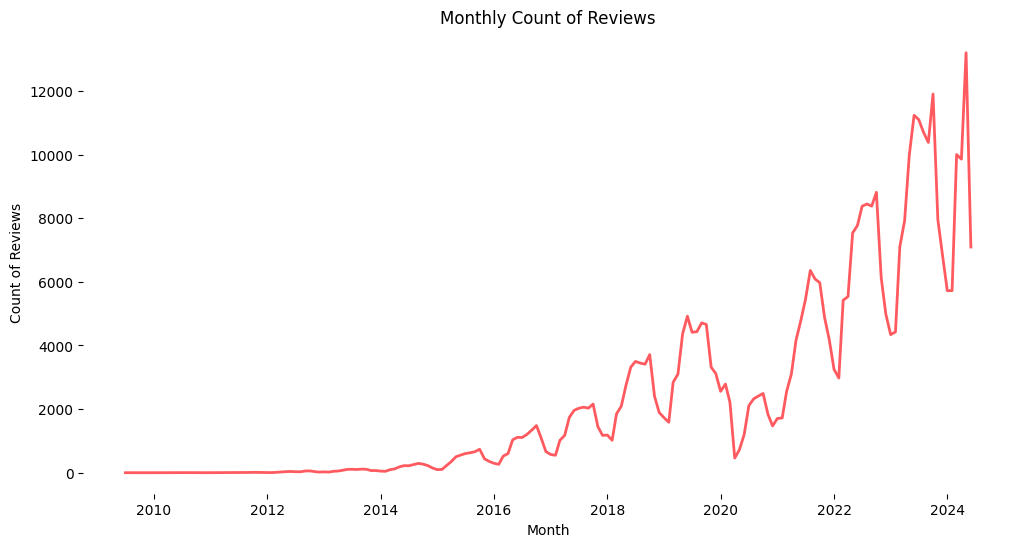

In [44]:
# Asegúrate de que la columna 'date' esté en formato de fecha
reviews_summary['date'] = pd.to_datetime(reviews_summary['date'])

# Agrupa las fechas por mes
reviews_summary['month'] = reviews_summary['date'].dt.to_period('M').dt.to_timestamp()  # Convierte a periodo mensual y luego a timestamp
reviews_summary_grouped = reviews_summary.groupby('month').size().reset_index(name='count')


plt.figure(figsize=(12, 6))
plt.plot(reviews_summary_grouped['month'], reviews_summary_grouped['count'], color='#FF5A5F', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.title('Monthly Count of Reviews')
plt.grid(False)  # Quitar las líneas del grid
plt.gca().spines['top'].set_visible(False)  # Quitar borde superior
plt.gca().spines['right'].set_visible(False)  # Quitar borde derecho
plt.gca().spines['left'].set_visible(False)  # Quitar borde izquierdo
plt.gca().spines['bottom'].set_visible(False)  # Quitar borde inferior
plt.show()



Evolution of Reviews Score Vs Price. Combine the 2 dataframes into a merged_df to generate a graph and to understand the evolution of the 2 metrics in the time.

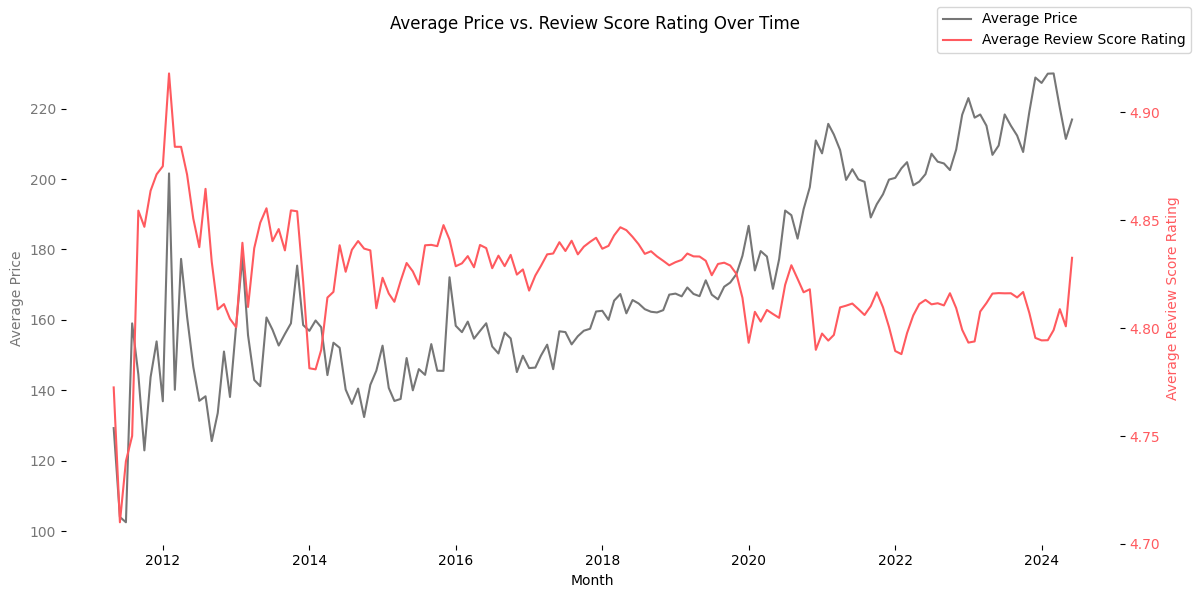

In [45]:
# Convierte la columna 'date' a datetime y filtrar a partir de 2011 (los datos anteriores a 2011 son pocos)
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['month'] = reviews['date'].dt.to_period('M').dt.to_timestamp()
reviews = reviews[reviews['month'] >= '2011-01-01']

# merge entre `listings_summary` y `reviews` en `listing_id`
merged_df = pd.merge(reviews, dataset[['id', 'price', 'review_scores_rating']], 
                     left_on='listing_id', right_on='id', how='inner')

# Convierte el precio a un tipo numérico si es necesario
merged_df['price'] = pd.to_numeric(merged_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Agrupa por mes y calcula el promedio de `price` y `review_scores_rating`
monthly_avg = merged_df.groupby('month')[['price', 'review_scores_rating']].mean().reset_index()

# Crea el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# eje 1 con precio promedio
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price', color='#767676')
ax1.plot(monthly_avg['month'], monthly_avg['price'], color='#767676', label='Average Price')
ax1.tick_params(axis='y', labelcolor='#767676')

# eje 2 con review score rating
ax2 = ax1.twinx()
ax2.set_ylabel('Average Review Score Rating', color='#FF5A5F')
ax2.plot(monthly_avg['month'], monthly_avg['review_scores_rating'], color='#FF5A5F', label='Average Review Score Rating')
ax2.tick_params(axis='y', labelcolor='#FF5A5F')


fig.suptitle('Average Price vs. Review Score Rating Over Time')
fig.tight_layout()
fig.legend(loc='upper right')


ax1.grid(False)
ax2.grid(False)
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.show()



Visualization: Reviews per month Vs Price

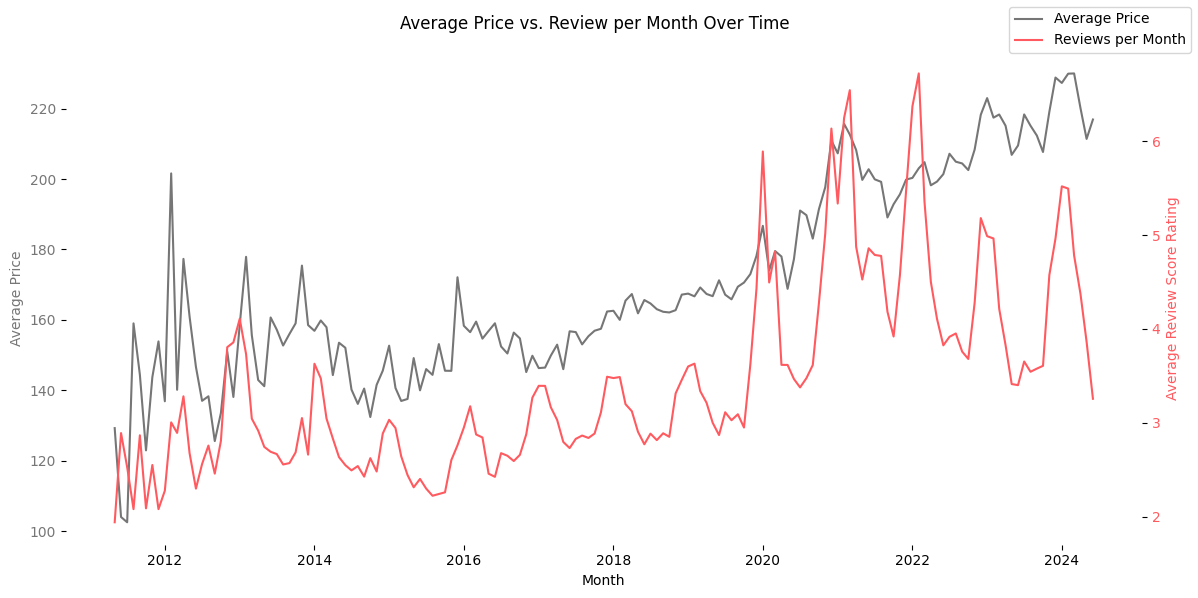

In [46]:
# Agrupa por mes y convierte las fechas a períodos mensuales
reviews['month'] = reviews['date'].dt.to_period('M').dt.to_timestamp()

reviews = reviews[reviews['month'] >= '2011-01-01']

# Merge entre `listings_summary` y `reviews` en `listing_id`
merged_df = pd.merge(reviews, dataset[['id', 'price', 'reviews_per_month']], 
                     left_on='listing_id', right_on='id', how='inner')

# Convierte el precio a un tipo numérico si es necesario (remueve símbolos como '$' si están presentes)
merged_df['price'] = pd.to_numeric(merged_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Agrupa por mes y calcula el promedio de `price` y `reviews_per_month`
monthly_avg = merged_df.groupby('month')[['price', 'reviews_per_month']].mean().reset_index()

# Grafica
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico para `price`
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price', color='#767676')
ax1.plot(monthly_avg['month'], monthly_avg['price'], color='#767676', label='Average Price')
ax1.tick_params(axis='y', labelcolor='#767676')

# Crea un segundo eje y para `review_scores_rating`
ax2 = ax1.twinx()
ax2.set_ylabel('Average Review Score Rating', color='#FF5A5F')
ax2.plot(monthly_avg['month'], monthly_avg['reviews_per_month'], color='#FF5A5F', label='Reviews per Month')
ax2.tick_params(axis='y', labelcolor='#FF5A5F')

fig.suptitle('Average Price vs. Review per Month Over Time')
fig.tight_layout()
fig.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
plt.show()

Visualization of the different topics on the reviews over the time

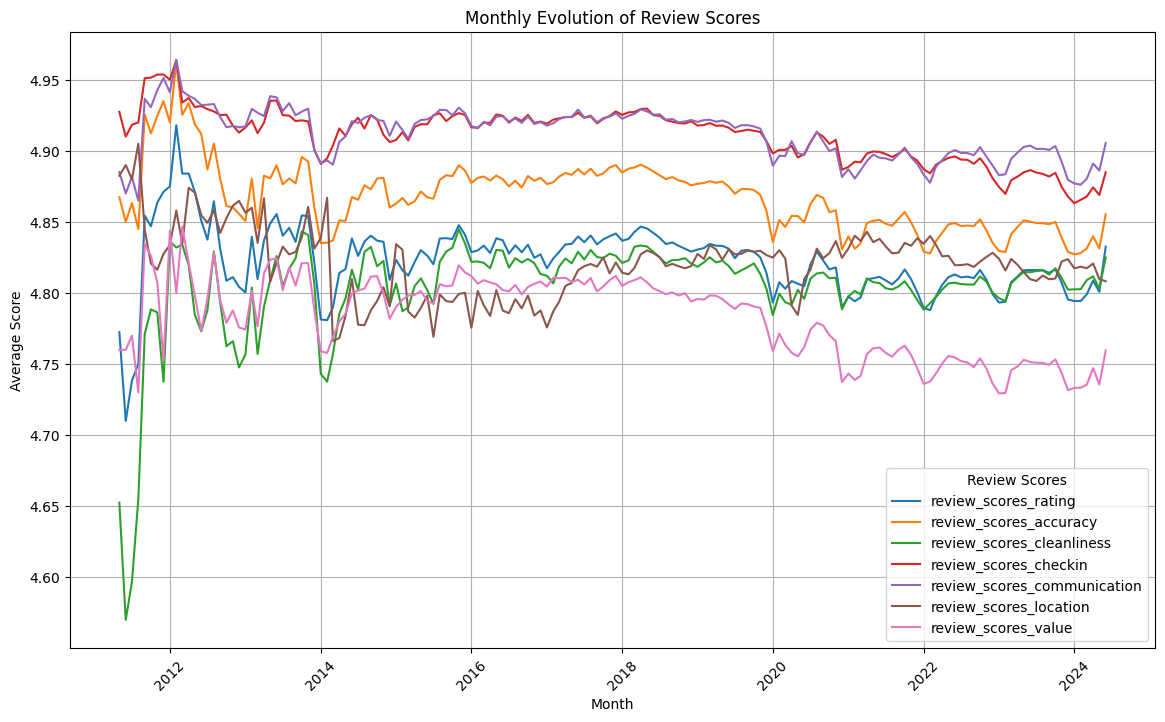

In [47]:
# Realiza el merge entre `listings_summary` y `reviews` para obtener las variables de puntuación
merged_df = pd.merge(reviews, dataset[['id', 'review_scores_rating', 'review_scores_accuracy', 
                                                'review_scores_cleanliness', 'review_scores_checkin', 
                                                'review_scores_communication', 'review_scores_location', 
                                                'review_scores_value']],
                     left_on='listing_id', right_on='id', how='inner')

# Agrupa por mes y calcula el promedio mensual para cada variable de puntuación
monthly_scores = merged_df.groupby('month')[['review_scores_rating', 'review_scores_accuracy', 
                                             'review_scores_cleanliness', 'review_scores_checkin', 
                                             'review_scores_communication', 'review_scores_location', 
                                             'review_scores_value']].mean().reset_index()

# Configura el gráfico
plt.figure(figsize=(14, 8))

# Grafica cada variable en el mismo gráfico de líneas
for column in monthly_scores.columns[1:]:
    plt.plot(monthly_scores['month'], monthly_scores[column], label=column)

# Personalización del gráfico
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.title('Monthly Evolution of Review Scores')
plt.legend(title="Review Scores")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Visualization of the first review and last review to understand new listings and listings that are no more in the platform 

<Figure size 1200x600 with 0 Axes>

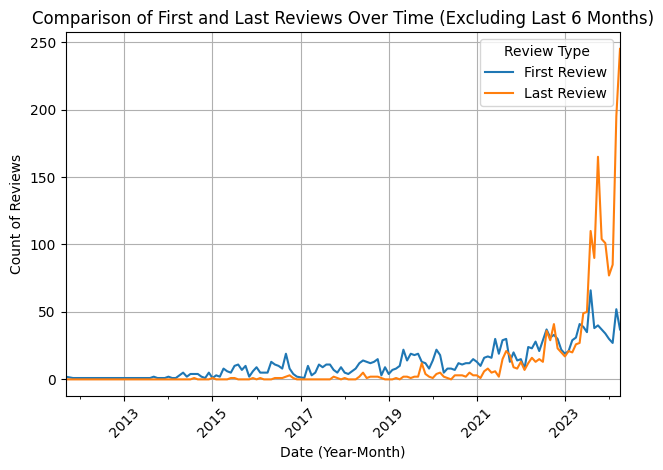

In [48]:
#elimino los 3 ultimos meses para visualizar mejor

# Convertir las columnas a tipo datetime
dataset['first_review'] = pd.to_datetime(dataset['first_review'], errors='coerce')
dataset['last_review'] = pd.to_datetime(dataset['last_review'], errors='coerce')

# Calcular la fecha actual y la fecha de corte
current_date = pd.to_datetime("now")
cutoff_date = current_date - pd.DateOffset(months=6)

# Filtrar el DataFrame para quitar los datos de los últimos 3 meses
filtered_summary = dataset[
    (dataset['first_review'] < cutoff_date) & 
    (dataset['last_review'] < cutoff_date)
]

# Crear un DataFrame que cuente el número de reseñas por mes
first_review_counts = filtered_summary['first_review'].dt.to_period('M').value_counts().sort_index()
last_review_counts = filtered_summary['last_review'].dt.to_period('M').value_counts().sort_index()

# Crear un DataFrame combinado
comparison_df = pd.DataFrame({
    'First Review': first_review_counts,
    'Last Review': last_review_counts
}).fillna(0)

# Graficar
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='line')
plt.title('Comparison of First and Last Reviews Over Time (Excluding Last 6 Months)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Review Type')
plt.grid()
plt.tight_layout()
plt.show()


In [49]:
dataset['number_of_reviews_ltm'].describe().round(2).T

count    7952.00
mean       14.30
std        21.59
min         0.00
25%         0.00
50%         6.00
75%        23.00
max       492.00
Name: number_of_reviews_ltm, dtype: float64

In [50]:
dataset['reviews_per_month'].describe().round(2).T

count    7952.00
mean        1.57
std         1.98
min         0.00
25%         0.15
50%         1.09
75%         2.43
max        54.09
Name: reviews_per_month, dtype: float64

In [51]:
# Define the bins and labels
bins = [0, 1, 2, 3, 4, 5, float('inf')]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Create a new column 'reviews_per_month_bin' with the binned data
dataset['reviews_per_month_bin'] = pd.cut(dataset['reviews_per_month'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(dataset[['reviews_per_month', 'reviews_per_month_bin']].head())

   reviews_per_month reviews_per_month_bin
0               2.10                   2-3
1               2.89                   2-3
2               0.75                   0-1
3               0.15                   0-1
4               1.27                   1-2


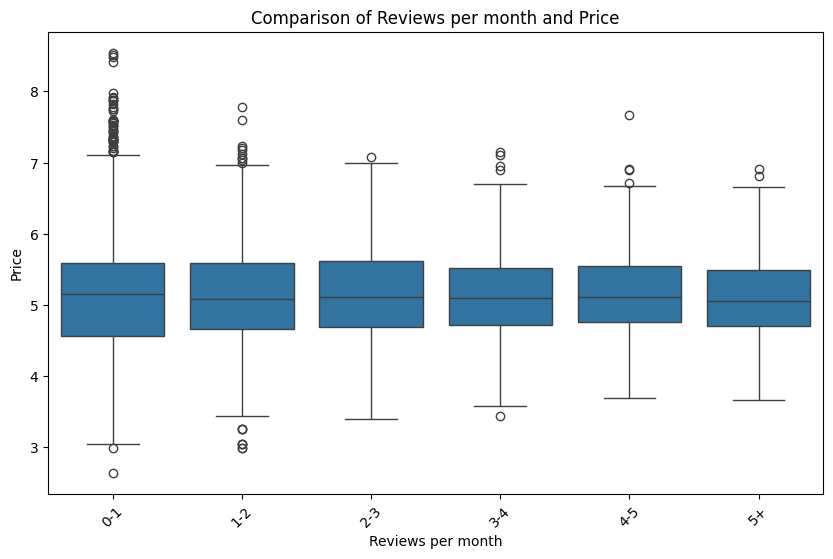

In [52]:
# Crear un gráfico de caja para comparar 'room_type' y 'price' Crear un gráfico de caja para comparar 'room_type' y 'price' Crear un gráfico de caja para comparar 'room_type' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews_per_month_bin', y='log_price', data=dataset)
plt.title('Comparison of Reviews per month and Price')
plt.xticks(rotation=45)
plt.xlabel('Reviews per month')
plt.ylabel('Price')
plt.show()

### 2. Hosts Vs SuperHosts

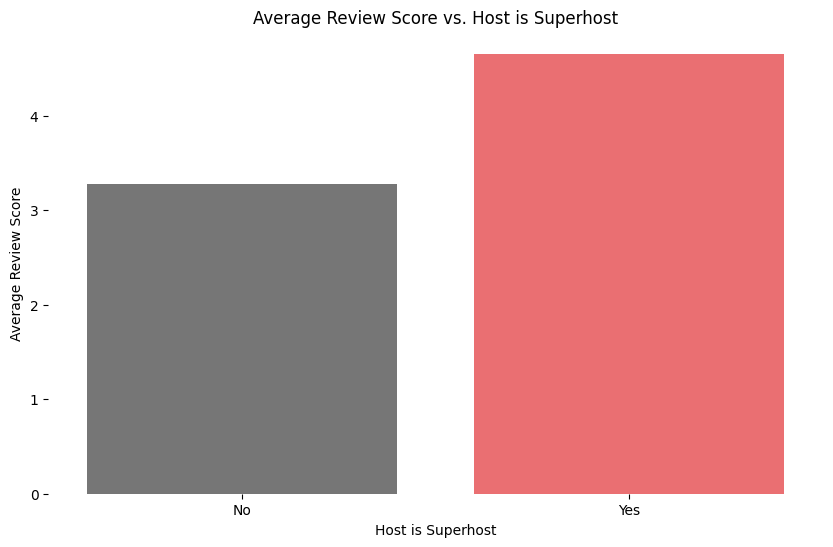

In [53]:
# Calculate the average price based on whether the host is a superhost or not
average_review_score_superhost = dataset.groupby('host_is_superhost')['review_scores_rating'].mean().reset_index()

# Convert 'host_is_superhost' to a categorical variable for better visualization
average_review_score_superhost['host_is_superhost'] = average_review_score_superhost['host_is_superhost'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Colores personalizados
colors = {'Yes': '#FF5A5F', 'No': '#767676'}

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='host_is_superhost', y='review_scores_rating', data=average_review_score_superhost, palette=colors, ci=None)
plt.title('Average Review Score vs. Host is Superhost')
plt.xlabel('Host is Superhost')
plt.ylabel('Average Review Score')

# Eliminar grid y bordes
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

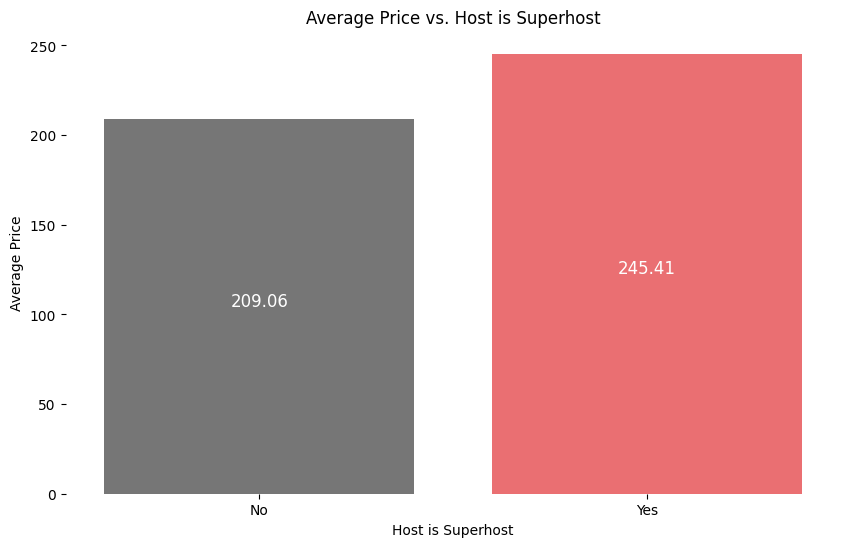

In [54]:
# Calcular el precio promedio basado en si el host es superhost o no
average_price_superhost = dataset.groupby('host_is_superhost')['price'].mean().reset_index()

# Convertir 'host_is_superhost' a una variable categórica para la visualización
average_price_superhost['host_is_superhost'] = average_price_superhost['host_is_superhost'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Colores personalizados
colors = {'Yes': '#FF5A5F', 'No': '#767676'}

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='host_is_superhost', y='price', data=average_price_superhost, palette=colors)

# Añadir anotaciones de valores en el centro de cada barra
for index, row in average_price_superhost.iterrows():
    plt.text(index, row['price'] / 2, f"{row['price']:.2f}", color='white', ha="center", fontsize=12)

# Configuración de etiquetas y título
plt.title('Average Price vs. Host is Superhost')
plt.xlabel('Host is Superhost')
plt.ylabel('Average Price')

# Eliminar grid y bordes
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()





### 3. Neighbourhoods

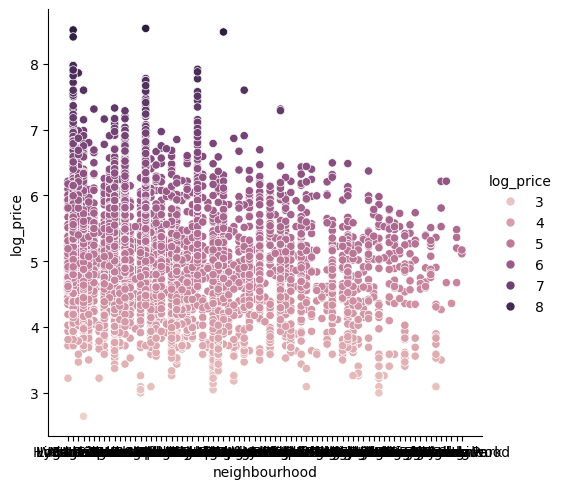

In [55]:
sns.relplot(data = dataset, x = 'neighbourhood', y = 'log_price', hue = 'log_price')

District vs log Price

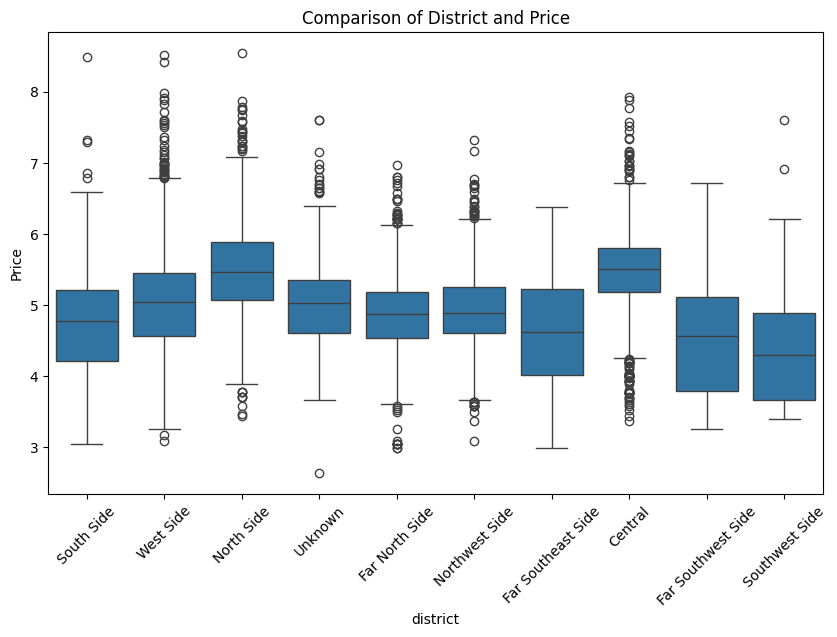

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='district', y='log_price', data=dataset)
plt.title('Comparison of District and Price')
plt.xticks(rotation=45)
plt.xlabel('district')
plt.ylabel('Price')
plt.show()

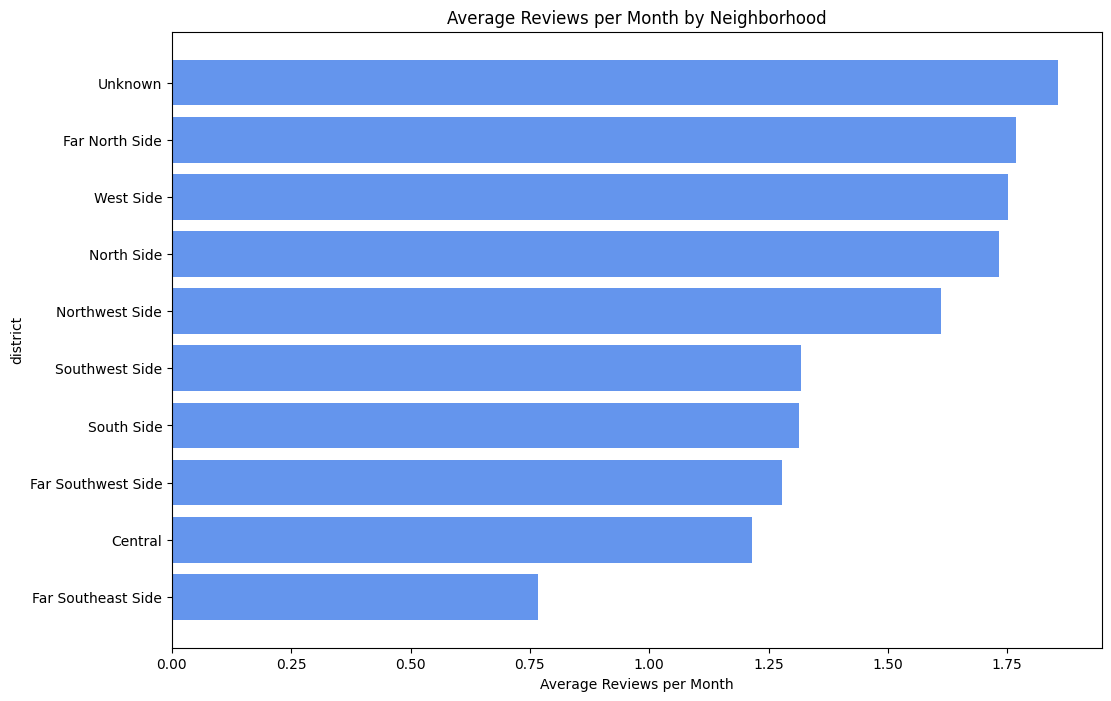

In [57]:
# Agrupa por vecindario y calcula el promedio de reviews_per_month
df_grouped = dataset.groupby('district')['reviews_per_month'].mean().reset_index()

# Ordena de mayor a menor para una mejor visualización
df_grouped = df_grouped.sort_values(by='reviews_per_month', ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(df_grouped['district'], df_grouped['reviews_per_month'], color='cornflowerblue')
plt.xlabel('Average Reviews per Month')
plt.ylabel('district')
plt.title('Average Reviews per Month by Neighborhood')
plt.gca().invert_yaxis()  # Invierte el eje y para que el vecindario con más reviews esté en la parte superior
plt.show()

### 4. Availability

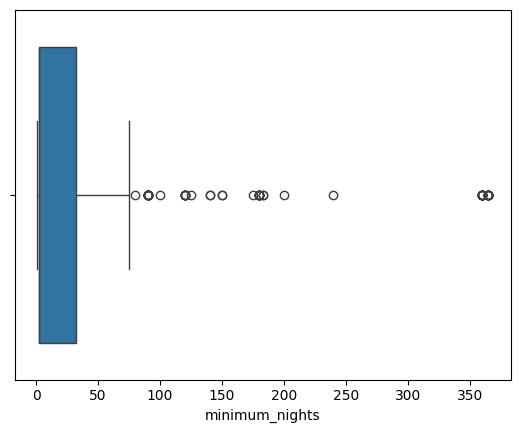

In [58]:
sns.boxplot(x=dataset['minimum_nights'])
plt.show()



#### Hosts and Superhosts

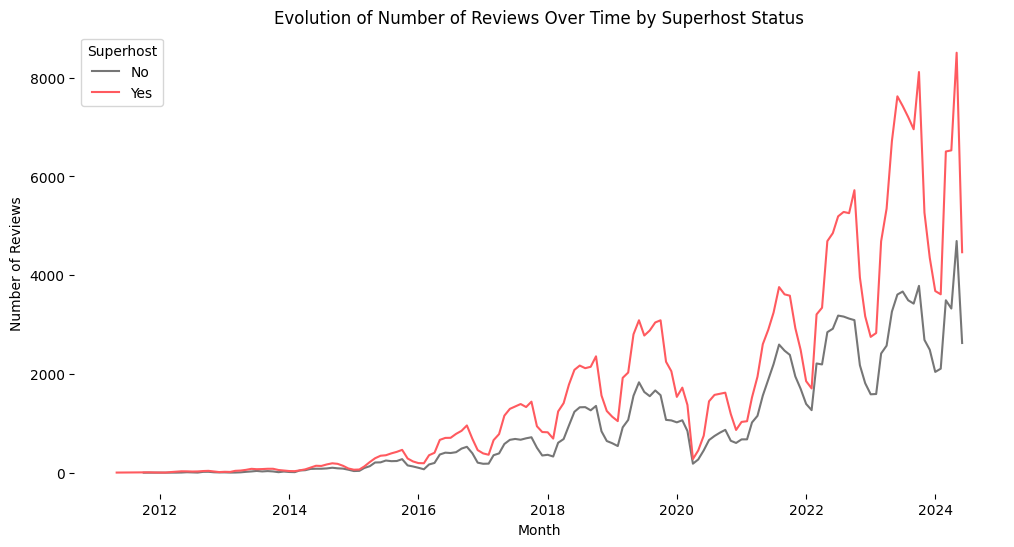

In [59]:
# Realizar el merge entre `reviews` y `dataset` para obtener la columna `host_is_superhost`
merged_reviews = pd.merge(reviews, dataset[['id', 'host_is_superhost']], 
                          left_on='listing_id', right_on='id', how='inner')

# Agrupar por mes y por si el host es superhost o no, y contar el número de reviews
reviews_grouped = merged_reviews.groupby(['month', 'host_is_superhost']).size().reset_index(name='count')

# Convertir 'host_is_superhost' a una variable categórica para un mejor manejo en la gráfica
reviews_grouped['host_is_superhost'] = reviews_grouped['host_is_superhost'].map({1: 'Yes', 0: 'No'})

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_grouped, x='month', y='count', hue='host_is_superhost', 
             palette={'No': '#767676', 'Yes': '#FF5A5F'}, hue_order=['No', 'Yes'])

plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Evolution of Number of Reviews Over Time by Superhost Status')

# Ajustar la leyenda
plt.legend(title='Superhost', loc='upper left')

plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()


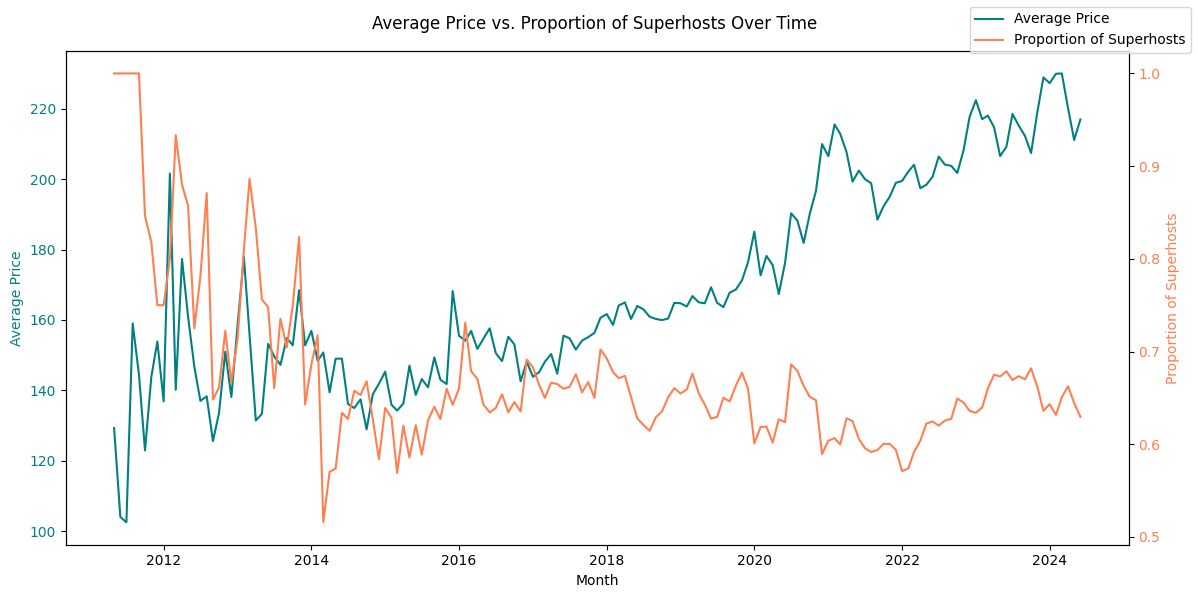

In [60]:
# Realiza el merge entre `listings` y `reviews` para incluir la columna `host_is_superhost`
merged_df = pd.merge(reviews, listings[['id', 'price', 'host_is_superhost']], 
                     left_on='listing_id', right_on='id', how='inner')

# Convierte el precio a un tipo numérico si es necesario (remueve símbolos como '$' si están presentes)
merged_df['price'] = pd.to_numeric(merged_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Convierte la columna `host_is_superhost` a numérica (1 para True, 0 para False)
merged_df['host_is_superhost'] = merged_df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

# Agrupa por mes y calcula el promedio de `price` y la proporción de `superhosts`
monthly_avg = merged_df.groupby('month').agg({'price': 'mean', 'host_is_superhost': 'mean'}).reset_index()

# Grafica
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico para `price`
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price', color='teal')
ax1.plot(monthly_avg['month'], monthly_avg['price'], color='teal', label='Average Price')
ax1.tick_params(axis='y', labelcolor='teal')

# Crea un segundo eje y para `host_is_superhost`
ax2 = ax1.twinx()
ax2.set_ylabel('Proportion of Superhosts', color='coral')
ax2.plot(monthly_avg['month'], monthly_avg['host_is_superhost'], color='coral', label='Proportion of Superhosts')
ax2.tick_params(axis='y', labelcolor='coral')

fig.suptitle('Average Price vs. Proportion of Superhosts Over Time')
fig.tight_layout()
fig.legend(loc='upper right')
plt.show()

### 5. Room types

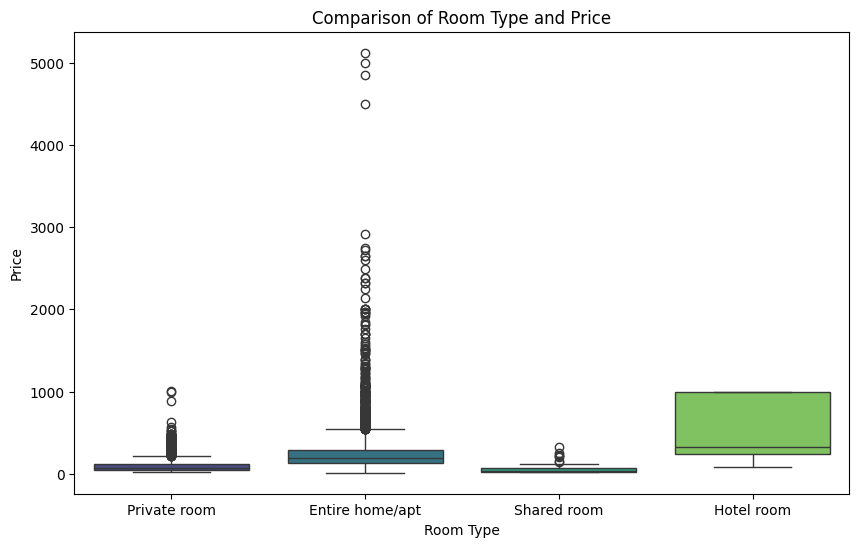

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=dataset, palette='viridis')
plt.title('Comparison of Room Type and Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

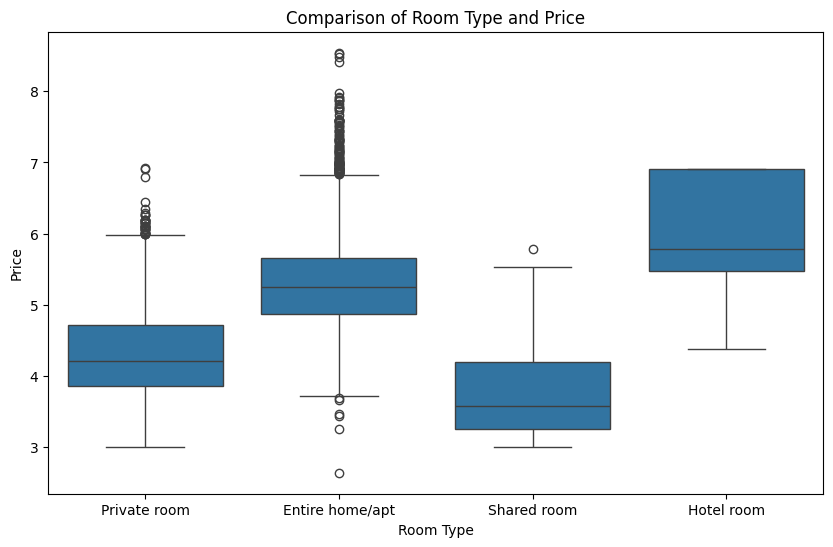

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='log_price', data=dataset)
plt.title('Comparison of Room Type and Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [63]:
dataset['price'].describe()

count    7952.000000
mean      225.363876
std       240.603447
min        13.000000
25%       104.000000
50%       170.000000
75%       268.000000
max      5120.000000
Name: price, dtype: float64

### TOP 10s

In [64]:
#saca un grafico con los top 10 barrios con precios mas altos
top_10_neighbourhoods = dataset.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
top_10_neighbourhoods = top_10_neighbourhoods.reset_index()
fig = px.bar(top_10_neighbourhoods, x='neighbourhood', y='price', color='price', title='Top 10 Neighborhoods with Highest Average Price')
fig.show()


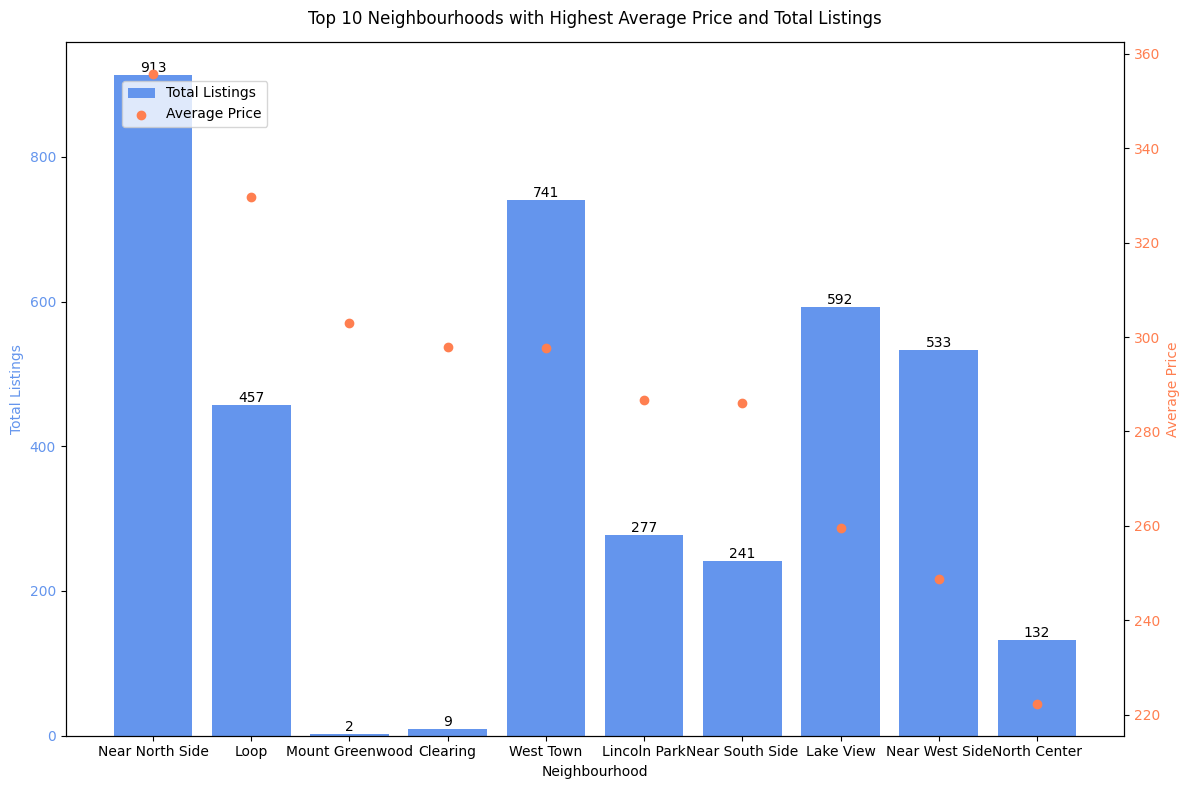

In [65]:
# Calcular el número total de alojamientos y el precio promedio por vecindario
neighbourhood_stats = dataset.groupby('neighbourhood').agg(
    total_listings=('id', 'count'),
    avg_price=('price', 'mean')
).sort_values(by='avg_price', ascending=False).head(10).reset_index()

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para el número total de alojamientos
bars = ax1.bar(neighbourhood_stats['neighbourhood'], neighbourhood_stats['total_listings'], color='cornflowerblue', label='Total Listings')
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Total Listings', color='cornflowerblue')
ax1.tick_params(axis='y', labelcolor='cornflowerblue')

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='black')

# Crear un segundo eje y para el precio promedio
ax2 = ax1.twinx()
ax2.scatter(neighbourhood_stats['neighbourhood'], neighbourhood_stats['avg_price'], color='coral', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Título y leyenda
fig.suptitle('Top 10 Neighbourhoods with Highest Average Price and Total Listings')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [66]:
# Obtener los top 10 hosts con más alojamientos
top_10_hosts = dataset['host_id'].value_counts().head(10).reset_index()
top_10_hosts.columns = ['host_id', 'total_listings']

# Unir con el nombre del host
top_10_hosts = top_10_hosts.merge(dataset[['host_id', 'host_name']].drop_duplicates(), on='host_id')

# Crear el gráfico
fig = px.bar(top_10_hosts, x='host_name', y='total_listings', color='total_listings', title='Top 10 Hosts with Most Listings')
fig.show()

In [67]:
dataset['host_name'].value_counts().sort_values(ascending=False).head(10)

host_name
Blueground           549
LuxurybookingsFZE    108
Level                 82
Cloud9                76
Matt                  73
Milan                 67
David                 65
John                  57
Dominic               57
Michael               56
Name: count, dtype: int64

In [68]:
dataset['review_scores_rating'].mean()

3.892398138832998

In [69]:
dataset['bedrooms'].value_counts()

bedrooms
1.0     3529
2.0     2073
3.0     1137
0.0      555
4.0      407
5.0      137
6.0       67
7.0       19
8.0       16
9.0        8
10.0       2
13.0       1
14.0       1
Name: count, dtype: int64

In [70]:
listings.shape

(7952, 75)

Top 10 apartamentos más reservados basados en el número total de reseñas

            id                                               name  \
1279  29819757   Hotel Perks - Private Bedroom | Private Bathroom   
1238  29093384       Traveler's Dream - 1 bed in a shared bedroom   
1718  38090971   Godfrey Hotel Lifestyle Rooftop 4.5*-King Deluxe   
2196  44126335     Kasa | 2BD, Walk to Lincoln Park Zoo | Chicago   
2195  44126327       Kasa | 1BD, Spectacular City Views | Chicago   
370   10069247                          Artist Loft, Private Room   
32      726376                 Spacious Studio, Amazing Location!   
331    8706915  Polk Street Coach House Apartment, Little Ital...   
518   14166242  Hip Chicago Apartment - FREE Parking Spot Incl...   
19      350347  Urban Chicago Loft, 1 blk to train w/ 2 pkg spots   

      number_of_reviews  
1279               3689  
1238               1777  
1718               1250  
2196               1030  
2195                908  
370                 890  
32                  821  
331                 795  
518   

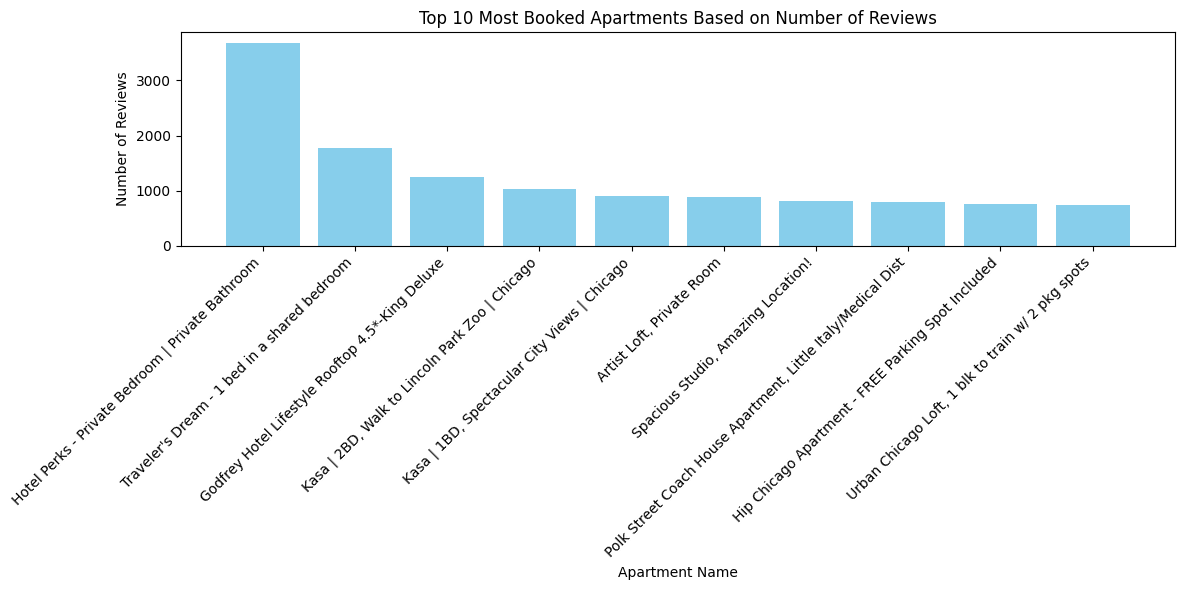

In [71]:
top_10_booked_apartments = dataset.nlargest(10, 'number_of_reviews')[['id', 'name', 'number_of_reviews']]


print(top_10_booked_apartments)

plt.figure(figsize=(12, 6))
plt.bar(top_10_booked_apartments['name'], top_10_booked_apartments['number_of_reviews'], color='skyblue')
plt.xlabel('Apartment Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most Booked Apartments Based on Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 most booked listings in a map

In [72]:
top_10_booked_apartments = dataset.nlargest(10, 'number_of_reviews')[['id', 'name', 'number_of_reviews', 'latitude', 'longitude']]

# Crear el gráfico de mapa
fig = px.scatter_mapbox(
    top_10_booked_apartments,
    lat='latitude',
    lon='longitude',
    hover_name='name',
    hover_data=['number_of_reviews'],
    color_discrete_sequence=["fuchsia"],
    zoom=10,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### 6. Price

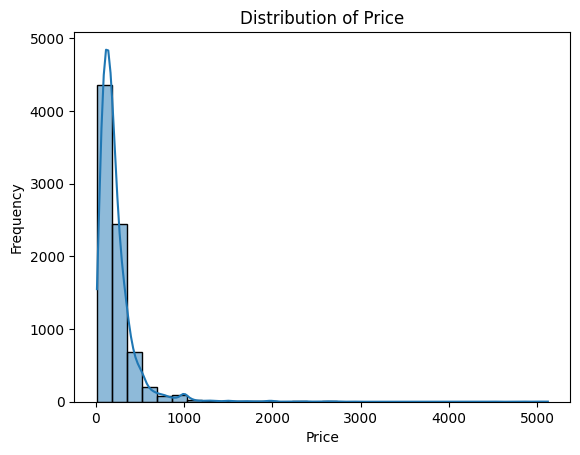

In [73]:
sns.histplot(dataset['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

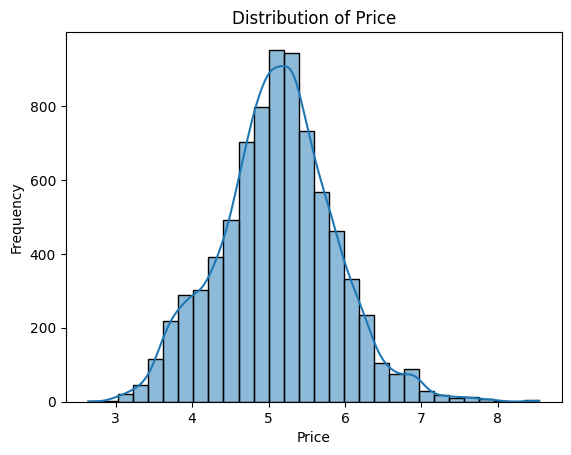

In [74]:
sns.histplot(dataset['log_price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

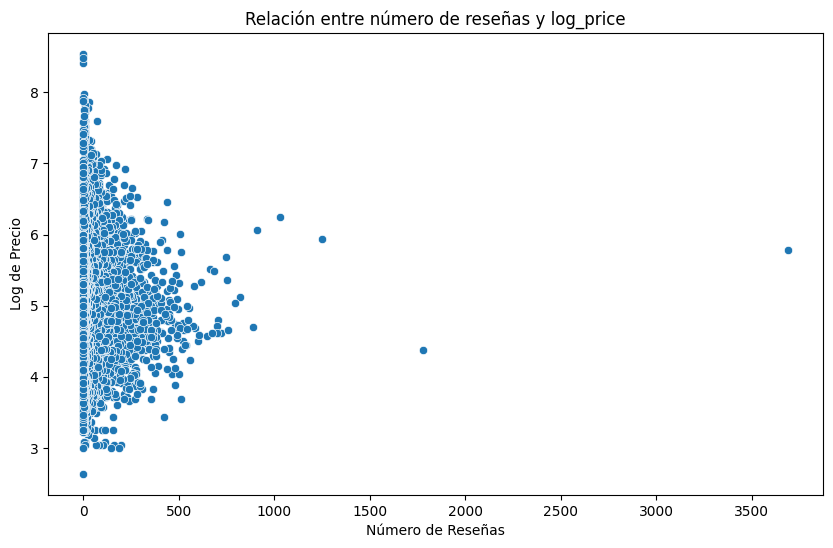

In [75]:
# Ejemplo de gráfico de dispersión entre log_price y number_of_reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='number_of_reviews', y='log_price')
plt.title('Relación entre número de reseñas y log_price')
plt.xlabel('Número de Reseñas')
plt.ylabel('Log de Precio')
plt.show()


### 7. Revenue and Roomnights 
I've done an estimation of the nights sold and the total income, based on the rule that 30% of the guests leave a review. 

In [76]:
# Assuming the number of nights booked is proportional to the number of reviews in the last 12 months (number_of_reviews_ltm)
# and considering the minimum stay and price as factors.

# Define a function to estimate the number of nights booked
def estimate_nights_booked(row):
    # Assuming each review represents a stay of minimum_nights
    estimated_nights = row['number_of_reviews_ltm'] * row['minimum_nights']
    return estimated_nights

# Apply the function to the dataset
dataset['estimated_nights_booked'] = dataset.apply(estimate_nights_booked, axis=1)

# Display the first few rows to verify
dataset[['minimum_nights', 'price', 'number_of_reviews_ltm', 'estimated_nights_booked']].head()

minimum_nights  price  number_of_reviews_ltm  estimated_nights_booked
0               3  125.0                     23                       69
1               2  104.0                     32                       64
2               4  188.0                     26                      104
3               2  339.0                      1                        2
4               2  214.0                     33                       66

In [77]:
total_booked_nights = dataset['estimated_nights_booked'] / 0.30

In [78]:
# Calculate the total income per property id based on the estimated nights booked and price
dataset['total_income'] = dataset['estimated_nights_booked'] * dataset['price']

# Display the first few rows to verify
dataset[['id', 'estimated_nights_booked', 'price', 'total_income']].head()

id  estimated_nights_booked  price  total_income
0   2384                       69  125.0        8625.0
1   7126                       64  104.0        6656.0
2  10945                      104  188.0       19552.0
3  12140                        2  339.0         678.0
4  28749                       66  214.0       14124.0

In [79]:
average_reviews_rating = dataset['review_scores_rating'].sum()/ len(dataset['id'])
average_reviews_rating

3.892398138832998

In [80]:
dataset['estimated_nights_booked'].mean()

45.749119718309856

In [81]:
average_total_income = (dataset['total_income'].sum() / 0.30) / len(dataset['id'])
average_total_income

31778.49526522458

### 8. Licenses

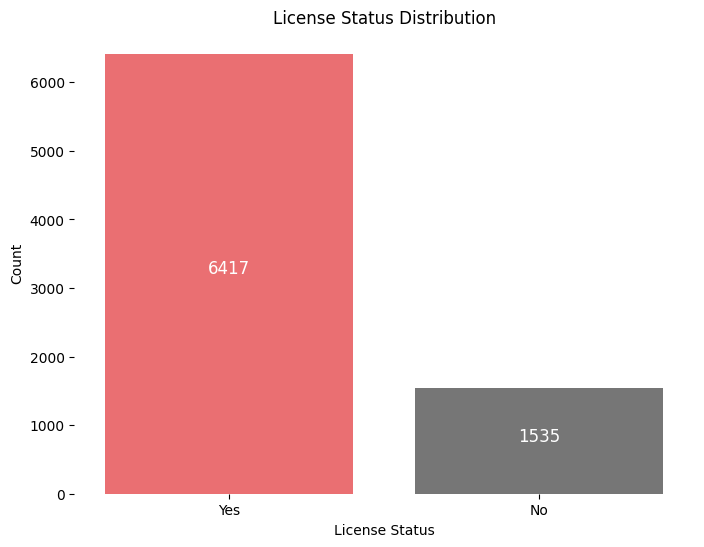

In [82]:
# Crear una nueva columna 'license_status' para categorizar 'No License' y 'Other'
dataset['license_status'] = dataset['license'].apply(lambda x: 'No' if x == 'No License' else 'Yes')

# Contar la cantidad de cada categoría
license_counts = dataset['license_status'].value_counts().reset_index()
license_counts.columns = ['license_status', 'count']

# Colores personalizados
colors = {'Yes': '#FF5A5F', 'No': '#767676'}

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='license_status', y='count', data=license_counts, palette=colors)

# Añadir anotaciones de valores en el centro de cada barra
for index, row in license_counts.iterrows():
    plt.text(index, row['count'] / 2, f"{row['count']}", color='white', ha="center", fontsize=12)

# Configuración de etiquetas y título
plt.title('License Status Distribution')
plt.xlabel('License Status')
plt.ylabel('Count')

# Eliminar grid y bordes
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

/var/folders/3k/lkz67hk967s8dvyhg9zrqdz80000gn/T/ipykernel_15044/1060347236.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3k/lkz67hk967s8dvyhg9zrqdz80000gn/T/ipykernel_15044/1060347236.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



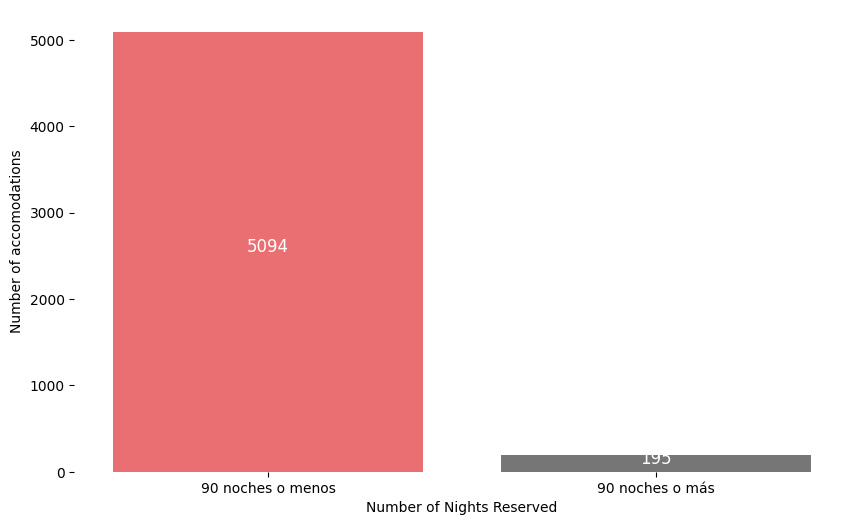

In [83]:
# Filtrar las reviews de este año
current_year = pd.to_datetime("now").year
reviews_this_year = reviews[reviews['date'].dt.year == current_year]

# Calcular el número de noches reservadas
reviews_this_year['nights_reserved'] = reviews_this_year.groupby('listing_id')['listing_id'].transform('count') / 0.30

# Crear una columna para clasificar los alojamientos
reviews_this_year['reservation_category'] = reviews_this_year['nights_reserved'].apply(lambda x: '90 noches o menos' if x <= 90 else '90 noches o más')

# Contar el número de alojamientos en cada categoría
reservation_counts = reviews_this_year.groupby('reservation_category')['listing_id'].nunique().reset_index()
reservation_counts.columns = ['reservation_category', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='reservation_category', y='count', data=reservation_counts, palette={'90 noches o menos': '#FF5A5F', '90 noches o más': '#767676'})

# Añadir anotaciones de valores en el centro de cada barra
for index, row in reservation_counts.iterrows():
    plt.text(index, row['count'] / 2, f"{row['count']}", color='white', ha="center", fontsize=12)

# Configuración de etiquetas y título
plt.xlabel('Number of Nights Reserved')
plt.ylabel('Number of accomodations')

# Eliminar grid y bordes
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()


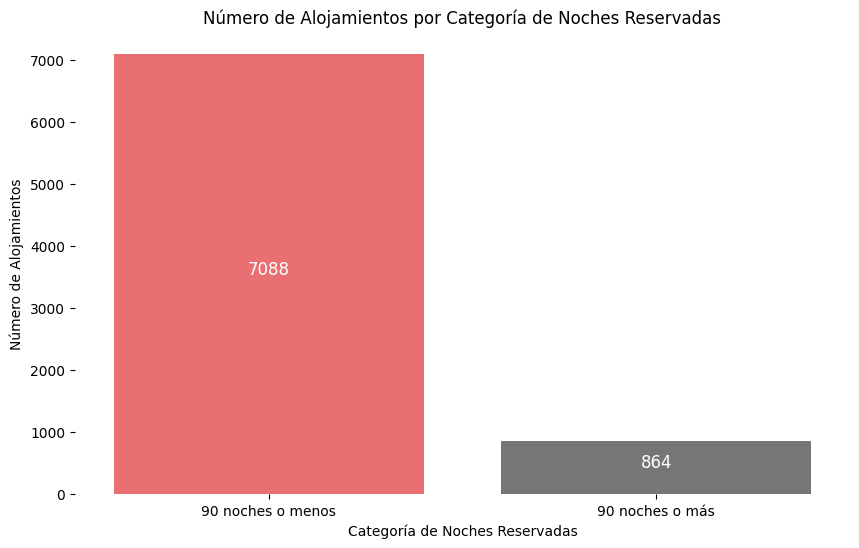

In [84]:
# Crear una columna para clasificar los alojamientos
dataset['reservation_category'] = dataset['estimated_nights_booked'].apply(lambda x: '90 noches o menos' if x <= 90 else '90 noches o más')

# Contar el número de alojamientos en cada categoría
reservation_counts = dataset['reservation_category'].value_counts().reset_index()
reservation_counts.columns = ['reservation_category', 'count']

# Colores personalizados
colors = {'90 noches o menos': '#FF5A5F', '90 noches o más': '#767676'}

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='reservation_category', y='count', data=reservation_counts, palette=colors)

# Añadir anotaciones de valores en el centro de cada barra
for index, row in reservation_counts.iterrows():
    plt.text(index, row['count'] / 2, f"{row['count']}", color='white', ha="center", fontsize=12)

# Configuración de etiquetas y título
plt.title('Número de Alojamientos por Categoría de Noches Reservadas')
plt.xlabel('Categoría de Noches Reservadas')
plt.ylabel('Número de Alojamientos')

# Eliminar grid y bordes
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

### 9. Minimum Stays

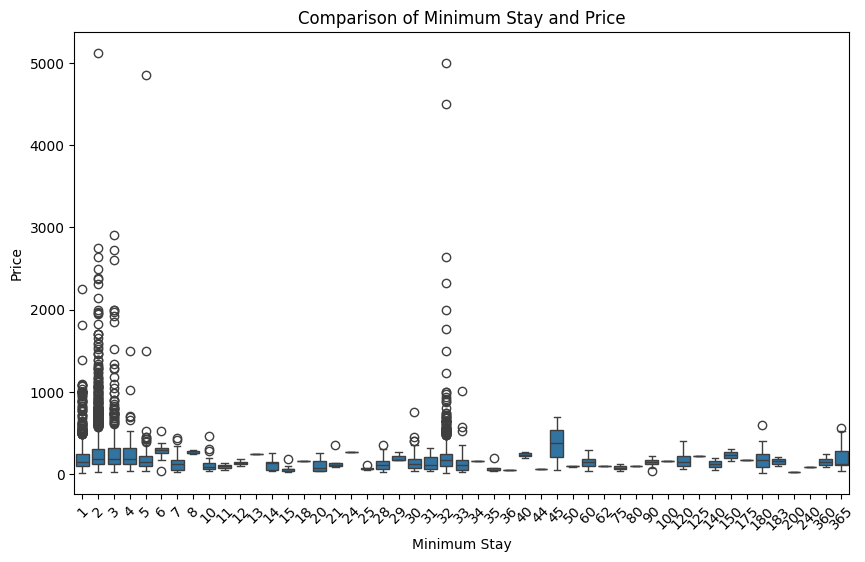

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='minimum_nights', y='price', data=dataset)
plt.title('Comparison of Minimum Stay and Price')
plt.xticks(rotation=45)
plt.xlabel('Minimum Stay')
plt.ylabel('Price')
plt.show()

### Correlation Matrix

In [86]:
df_corr = dataset.copy()

In [87]:
df_corr.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'log_price', 'amenities',
       'host_is_superhost', 'host_total_listings_count', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews_l30d', 'district', 'wifi',
       'gym', 'pool', 'air_conditioning', 'heating', 'parking',
       'reviews_per_month_bin', 'estimated_nights_booked', 'total_income',
       'license_status', 'reservation_category'],
      dtype='object')

In [88]:
['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'log_price', 'amenities',
       'host_is_superhost', 'host_total_listings_count', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews_l30d', 'district', 'wifi',
       'gym', 'pool', 'air_conditioning', 'heating', 'parking'],

(['id',
  'name',
  'host_id',
  'host_name',
  'neighbourhood',
  'latitude',
  'longitude',
  'room_type',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'last_review',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365',
  'number_of_reviews_ltm',
  'license',
  'log_price',
  'amenities',
  'host_is_superhost',
  'host_total_listings_count',
  'property_type',
  'accommodates',
  'bathrooms',
  'bedrooms',
  'first_review',
  'review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value',
  'number_of_reviews_l30d',
  'district',
  'wifi',
  'gym',
  'pool',
  'air_conditioning',
  'heating',
  'parking'],)

Select columns for the correlation:
[                   'neighbourhood', 'latitude',
                    'longitude', 'room_type', 'price', 'minimum_nights',
                    'number_of_reviews', 'last_review', 'reviews_per_month',
                    'license', 'log_price', 'amenities',
                    'host_is_superhost', 'property_type',
                    'accommodates', 'bathrooms', 'bedrooms', 'first_review',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'number_of_reviews_l30d', 'district', 'wifi',
                    'gym', 'pool', 'air_conditioning', 'heating', 'parking']

In [89]:
columns_to_keep = [
    'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
    'number_of_reviews', 'last_review','license',
    'host_is_superhost', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'first_review',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'district', 'wifi', 'gym', 'pool', 'air_conditioning', 'heating', 'parking'
]

df_corr = df_corr[columns_to_keep]
df_corr.head()


neighbourhood  latitude  longitude        room_type  price  \
0     Hyde Park  41.78790  -87.58780     Private room  125.0   
1     West Town  41.90166  -87.68021  Entire home/apt  104.0   
2  Lincoln Park  41.91196  -87.63981  Entire home/apt  188.0   
3  Lincoln Park  41.92357  -87.64947     Private room  339.0   
4  Logan Square  41.92137  -87.67933  Entire home/apt  214.0   

   number_of_reviews last_review       license  host_is_superhost  \
0                242  2024-06-08  R17000015609                  1   
1                527  2024-06-01  R24000114046                  1   
2                 93  2024-06-16       2209984                  1   
3                 16  2024-05-27  R20000055258                  0   
4                210  2024-06-18  R24000113825                  1   

            property_type  ...  review_scores_communication  \
0   Private room in condo  ...                         4.98   
1      Entire rental unit  ...                         4.87   
2      Entire rental unit  ...                         4.86   
3  Room in boutique hotel  ...                         5.00   
4             Entire loft  ...                         4.86   

   review_scores_location  review_scores_value    district  wifi  gym  pool  \
0                    4.96                 4.94  South Side     0    0     0   
1                    4.89                 4.76   West Side     1    0     0   
2                    4.98                 4.70  North Side     1    0     0   
3                    5.00                 4.81  North Side     1    0     0   
4                    4.92                 4.70     Unknown     1    0     0   

   air_conditioning  heating  parking  
0                 0        1        1  
1                 0        0        1  
2                 0        0        1  
3                 0        1        1  
4                 1        1        1  

[5 rows x 28 columns]

In [90]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   neighbourhood                7952 non-null   object        
 1   latitude                     7952 non-null   float64       
 2   longitude                    7952 non-null   float64       
 3   room_type                    7952 non-null   object        
 4   price                        7952 non-null   float64       
 5   number_of_reviews            7952 non-null   int64         
 6   last_review                  6503 non-null   datetime64[ns]
 7   license                      7952 non-null   object        
 8   host_is_superhost            7952 non-null   int64         
 9   property_type                7952 non-null   object        
 10  accommodates                 7952 non-null   int64         
 11  bathrooms                    7952 non-null 

In [91]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder de las variables categoricas de df_corr

le = LabelEncoder()
categories = df_corr.select_dtypes(include=['object']).columns
for col in categories:
    df_corr[col] = le.fit_transform(df_corr[col])
    
df_corr.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   neighbourhood                7952 non-null   int64         
 1   latitude                     7952 non-null   float64       
 2   longitude                    7952 non-null   float64       
 3   room_type                    7952 non-null   int64         
 4   price                        7952 non-null   float64       
 5   number_of_reviews            7952 non-null   int64         
 6   last_review                  6503 non-null   datetime64[ns]
 7   license                      7952 non-null   int64         
 8   host_is_superhost            7952 non-null   int64         
 9   property_type                7952 non-null   int64         
 10  accommodates                 7952 non-null   int64         
 11  bathrooms                    7952 non-null 

In [92]:
df_corr['price'].skew()

6.8083484792629

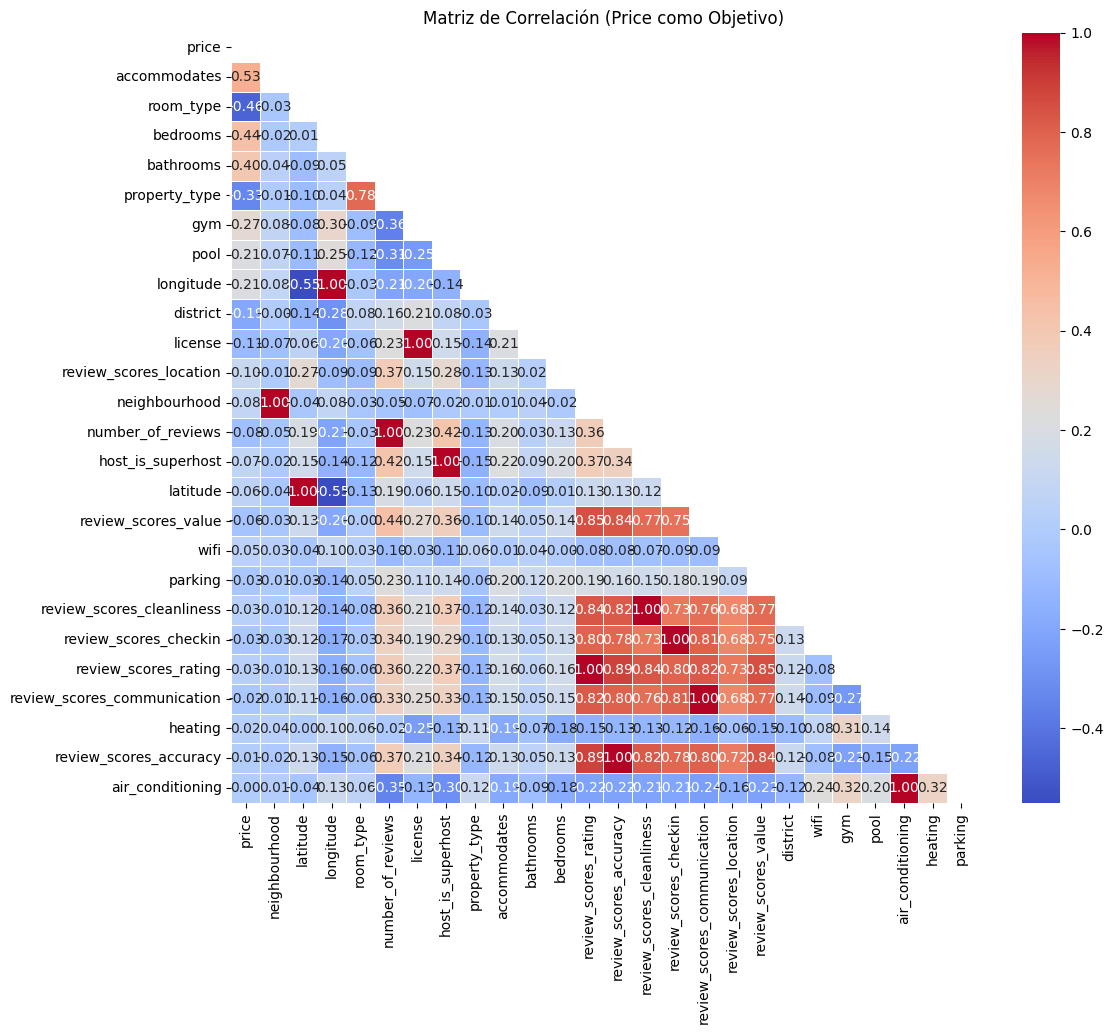

In [93]:
# Correlation matrix spearman as price is not normally distributed
numeric_df = df_corr.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr(method='spearman')


correlation_matrix = correlation_matrix[['price'] + [col for col in correlation_matrix.columns if col != 'price']]
correlation_matrix = correlation_matrix.loc[['price'] + [col for col in correlation_matrix.index if col != 'price']]

# sort values
correlation_matrix = correlation_matrix.loc[correlation_matrix['price'].abs().sort_values(ascending=False).index]

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (Price como Objetivo)')
plt.show()

In [94]:

def get_highly_correlated_columns(dataset, target_column, threshold=0.5):
    # Calculate the correlation matrix
    correlation_matrix = dataset.corr()
    
    # Get the correlation values for the target column
    target_correlation = correlation_matrix[target_column]
    
    # Filter columns with correlation greater than the threshold
    highly_correlated_columns = target_correlation[abs(target_correlation) > threshold].index.tolist()
    
    # Remove the target column from the list
    highly_correlated_columns.remove(target_column)
    
    return highly_correlated_columns

# Example usage
highly_correlated_columns = get_highly_correlated_columns(df_corr, 'price')
print(highly_correlated_columns)

['accommodates', 'bathrooms']


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Map Visualizations

Room types in the map

In [95]:
fig = px.scatter_mapbox(dataset, lat="latitude", lon="longitude", hover_name="name", hover_data=["district", "room_type"],
                        color="room_type", zoom=10, height=600)

# Configurar el estilo del mapa
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Average price per neighbourhood

In [96]:
# Calcular la media del precio por vecindario
mean_price_by_neighbourhood = dataset.groupby('neighbourhood')['price'].mean().reset_index()

# Merge con el dataframe original para obtener las coordenadas
df_merged = pd.merge(mean_price_by_neighbourhood, dataset[['neighbourhood', 'latitude', 'longitude']].drop_duplicates(), on='neighbourhood')

fig = px.scatter_mapbox(df_merged, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["price"],
                        size="price", color="price", color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Average price per district

In [97]:
# Calcular la media del precio por district
mean_price_by_neighbourhood = dataset.groupby('district')['price'].mean().reset_index()

# Merge con el dataframe original para obtener las coordenadas
df_merged = pd.merge(mean_price_by_neighbourhood, dataset[['district', 'latitude', 'longitude']].drop_duplicates(), on='district')

fig = px.scatter_mapbox(df_merged, lat="latitude", lon="longitude", hover_name="district", hover_data=["price"],
                        size="price", color="price", color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [98]:
import folium
from folium.plugins import FastMarkerCluster

# Extraer las latitudes y longitudes del dataset
lats = dataset['latitude'].tolist()
lons = dataset['longitude'].tolist()
locations = list(zip(lats, lons))

# Crear el mapa centrado en Chicago
map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=12)


FastMarkerCluster(data=locations).add_to(map_chicago)

map_chicago

Map with license vs no license

In [99]:
dataset['license'].value_counts()

license
No License                                                                                1535
City registration pending                                                                  229
2792126                                                                                    134
32+ Days Listing                                                                           113
32+days Listing                                                                             45
2863615                                                                                     34
2845517                                                                                     24
2834965                                                                                     22
2780536                                                                                     22
R18000024404                                                                                20
R19000046222                              

In [100]:
# Filtrar el dataset para incluir solo los IDs que no tienen licencia
no_license_dataset = dataset[dataset['license'] == 'No License']

# Extraer las latitudes y longitudes del dataset filtrado
lats = no_license_dataset['latitude'].tolist()
lons = no_license_dataset['longitude'].tolist()
locations = list(zip(lats, lons))

# Crear el mapa centrado en Chicago
map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Añadir los marcadores al mapa
FastMarkerCluster(data=locations).add_to(map_chicago)
map_chicago


In [101]:
px.scatter_mapbox(dataset, 
                  lat='latitude', 
                  lon='longitude', 
                  size='price', zoom=10, mapbox_style='carto-positron', 
                  title='AirBnb Apartment Distribution in Amsterdam', 
                  template= "plotly_dark", 
                  size_max=20, animation_frame='room_type')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Regresion model on Price

In [102]:
df_corr.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'license', 'host_is_superhost',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms',
       'first_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'district', 'wifi', 'gym', 'pool',
       'air_conditioning', 'heating', 'parking'],
      dtype='object')

In [103]:
model_columns = ['accommodates', 'room_type', 'bedrooms', 'bathrooms', 'district', 'gym', 'pool','parking','license','review_scores_rating', 'price']

In [104]:
# Cuenta la frecuencia de cada valor en la columna price
price_counts = df_corr['price'].value_counts()
# Filtra los valores que tienen frecuencia igual a 1
unique_prices = price_counts[price_counts == 1].index
print(unique_prices)

Index([1969.0, 2721.0, 2911.0, 1918.0, 1276.0,  461.0, 1180.0,  651.0, 1225.0,
       2321.0,
       ...
        444.0,  793.0,  653.0, 1851.0, 1061.0,  649.0,  519.0,  585.0, 1018.0,
        763.0],
      dtype='float64', name='price', length=253)


In [105]:
# Filtra el DataFrame excluyendo los valores de price que solo aparecen una vez
df_corr_filtered = df_corr[~df_corr['price'].isin(unique_prices)]
print(f"Número de filas antes de filtrar: {df_corr.shape[0]}")
print(f"Número de filas después de filtrar: {df_corr_filtered.shape[0]}")


Número de filas antes de filtrar: 7952
Número de filas después de filtrar: 7699


In [106]:
df_corr_filtered = df_corr[model_columns]


In [107]:
from pycaret.classification import *
from pycaret.regression import *

In [108]:
print(df_corr_filtered['price'].dtype)


float64


In [109]:
exp_regression = setup(
    data=df_corr_filtered,
    target='price',
    session_id=453,
    verbose=True
)


In [110]:
best_model = compare_models()

## Scalated Regression Model

In [111]:
df_scaled = df_corr_filtered.copy()

<Axes: >

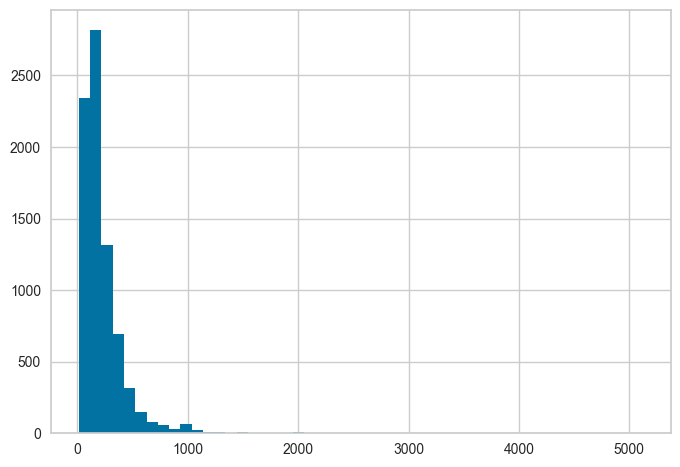

In [112]:
# Verificar la distribución de 'price'
df_scaled['price'].hist(bins=50)


<Axes: >

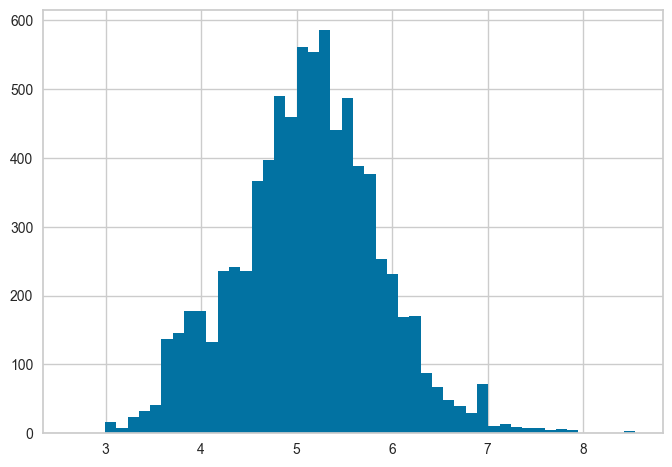

In [113]:
# Transformación logarítmica de 'price'
df_scaled['log_price'] = np.log(df_scaled['price'] + 1)  # +1 para evitar problemas con log(0)

# Verificar la nueva distribución
df_scaled['log_price'].hist(bins=50)


In [114]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Supongamos que ya tienes un DataFrame llamado df que incluye la columna 'district'
# df = pd.read_csv('tu_archivo.csv')  # Cargar tus datos

# 1. Codificación One-Hot para 'district'
df_dummies = pd.get_dummies(df_scaled, columns=['district', 'room_type'], drop_first=True)

# 2. Selección de características
features = ['accommodates', 'bedrooms', 'bathrooms', 'gym', 'pool', 'parking',
            'license', 'review_scores_rating'] + [col for col in df_dummies.columns if any(x in col for x in ('district', 'room_type'))]

# Asegúrate de incluir log_price como tu variable objetivo
X = df_dummies[features]
y = df_dummies['log_price']  # Asegúrate de que 'log_price' está en el DataFrame

# 3. Partición de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalado de datos
scaler = StandardScaler()
scaler.fit(X_train)  # Ajusta el scaler solo a los datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Partición de datos para análisis de modelos
n_splits = 8
kf = KFold(n_splits=n_splits)

# 6. Diccionario de modelos
models = {
    'OLS': LinearRegression(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, 
                                      max_features='sqrt', min_samples_leaf=15, 
                                      min_samples_split=10, loss='huber', random_state=5)
}

# 7. Bucle para probar modelos
for name, model in models.items():
    print(f'Probamos modelo {name}:')
    rmse = []
    for train_idx, test_idx in kf.split(X_train_scaled):
        model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])  # Fit the model
        y_pred = model.predict(X_train_scaled[test_idx])  # Make predictions
        rmse.append(np.sqrt(np.mean((np.expm1(y_train.iloc[test_idx]) - np.expm1(y_pred)) ** 2)))  # Calculate RMSE
    print(f'El RMSE medio de las estimaciones es: {np.mean(rmse):.2f}')


Probamos modelo OLS:
El RMSE medio de las estimaciones es: 154.98
Probamos modelo SVR:
El RMSE medio de las estimaciones es: 145.48
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: 154.98
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: 234.72
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: 234.72
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: 143.22
Probamos modelo XGB:
El RMSE medio de las estimaciones es: 141.84


In [115]:
district_mapping = {
    0: 'Hyde Park - Walk to The University of Chicago',
    1: 'Downtown Chicago',
    2: 'Lincoln Park',
    3: 'West Loop',
    4: 'North Center',
    5: 'Chinatown',
    6: 'Near North Side',
    7: 'Oak Park',
    8: 'Bridgeport',
    9: 'South Shore'
}


df_scaled['district'] = df_scaled['district'].map(district_mapping)


In [116]:
df_scaled['district'].value_counts()

district
North Center                                     1782
South Shore                                      1335
Hyde Park - Walk to The University of Chicago    1231
Near North Side                                  1039
Downtown Chicago                                  933
Chinatown                                         677
Bridgeport                                        480
Oak Park                                          180
Lincoln Park                                      160
West Loop                                         135
Name: count, dtype: int64

In [117]:
import joblib


xgb_model = models['XGB']
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, 'xgb_model.pkl')



['xgb_model.pkl']

In [118]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [119]:
import joblib

# Guarda el modelo
joblib.dump(model, 'modelo_regresion3.pkl')


['modelo_regresion3.pkl']

In [120]:
dataset.to_csv('dataset.csv', index=False)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Hypothesis test 

In [121]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

### Variable Price Vs Host/SuperHost

El p-valor para Shapiro-Wilk (superhost) es: 4.68875087952618e-16
El p-valor para Shapiro-Wilk (host) es: 6.7497090951379804e-15
El p-valor obtenido en el test de Mann-Whitney es de 4.1112712285477803e-11


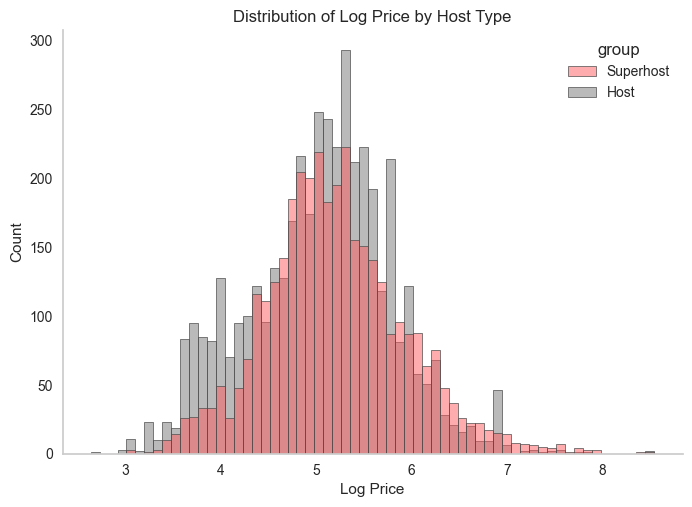

In [122]:
from scipy.stats import mannwhitneyu, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos para evitar valores nulos
dataset = dataset.dropna(subset=['log_price', 'host_is_superhost'])

# Filtrar datos para cada grupo
superhost = dataset[dataset['host_is_superhost'] == True]['log_price']
host = dataset[dataset['host_is_superhost'] == False]['log_price']

# Verificar que ambas muestras tengan al menos tres observaciones
if len(superhost) >= 3 and len(host) >= 3:
    # Prueba de Shapiro-Wilk para normalidad
    shapiro_test_superhost = shapiro(superhost)
    shapiro_test_host = shapiro(host)
    print(f"El p-valor para Shapiro-Wilk (superhost) es: {shapiro_test_superhost[1]}")
    print(f"El p-valor para Shapiro-Wilk (host) es: {shapiro_test_host[1]}")

    # Prueba de Mann-Whitney para comparar medianas
    MW_test = mannwhitneyu(superhost, host, alternative='two-sided')
    print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")
    palette = {'Superhost': '#FF5A5F', 'Host': '#767676'}

    # Visualización con histograma
    dataset['group'] = dataset['host_is_superhost'].apply(lambda x: 'Superhost' if x else 'Host')
    sns.histplot(data=dataset[dataset['log_price'] > 0], x="log_price", hue="group",
             palette=palette, edgecolor=".3", linewidth=.5)
    plt.xlabel('Log Price')
    plt.title('Distribution of Log Price by Host Type')
    plt.grid(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()
else:
    print("Error: Uno de los grupos no tiene suficientes observaciones para realizar la prueba.")


El p-valor para Shapiro-Wilk (superhost) es: 0.0
El p-valor para Shapiro-Wilk (host) es: 0.0
El p-valor obtenido en el test de Mann-Whitney es de 1.4746533536159162e-10


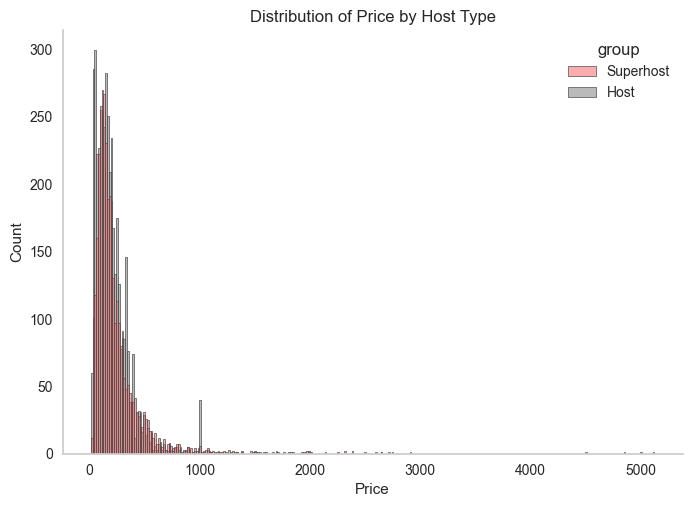

In [123]:
from scipy.stats import mannwhitneyu, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos para evitar valores nulos
dataset = dataset.dropna(subset=['price', 'host_is_superhost'])

# Filtrar datos para cada grupo
superhost = dataset[dataset['host_is_superhost'] == True]['price']
host = dataset[dataset['host_is_superhost'] == False]['price']

# Verificar que ambas muestras tengan al menos tres observaciones
if len(superhost) >= 3 and len(host) >= 3:
    # Prueba de Shapiro-Wilk para normalidad
    shapiro_test_superhost = shapiro(superhost)
    shapiro_test_host = shapiro(host)
    print(f"El p-valor para Shapiro-Wilk (superhost) es: {shapiro_test_superhost[1]}")
    print(f"El p-valor para Shapiro-Wilk (host) es: {shapiro_test_host[1]}")

    # Prueba de Mann-Whitney para comparar medianas
    MW_test = mannwhitneyu(superhost, host, alternative='two-sided')
    print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")
    palette = {'Superhost': '#FF5A5F', 'Host': '#767676'}

    # Visualización con histograma
    dataset['group'] = dataset['host_is_superhost'].apply(lambda x: 'Superhost' if x else 'Host')
    sns.histplot(data=dataset[dataset['price'] > 0], x="price", hue="group",
             palette=palette, edgecolor=".3", linewidth=.5)
    plt.xlabel('Price')
    plt.title('Distribution of Price by Host Type')
    plt.grid(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    
    plt.show()
else:
    print("Error: Uno de los grupos no tiene suficientes observaciones para realizar la prueba.")

### Chi Test Room Type and Host is Superhost

In [124]:
import pandas as pd
from scipy.stats import chi2_contingency

# Paso 1: Preparar los datos
# Asegúrate de que las columnas sean categóricas
dataset['room_type'] = dataset['room_type'].astype('category')
dataset['host_is_superhost'] = dataset['host_is_superhost'].astype('category')

# Paso 2: Crear la tabla de contingencia
contingency_table = pd.crosstab(dataset['room_type'], dataset['host_is_superhost'])

# Paso 3: Realizar el test de Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Paso 4: Interpretar los resultados
alpha = 0.05
print(f"Chi2: {chi2}, p-valor: {p}")
if p < alpha:
    print("Se rechaza la hipótesis nula: hay una asociación significativa entre room_type y host_is_superhost.")
else:
    print("No se puede rechazar la hipótesis nula: no hay una asociación significativa entre room_type y host_is_superhost.")


Chi2: 142.41446603964874, p-valor: 1.1397950473055252e-30
Se rechaza la hipótesis nula: hay una asociación significativa entre room_type y host_is_superhost.


In [125]:

# Filtrar datos para evitar valores nulos
dataset = dataset.dropna(subset=['estimated_nights_booked', 'host_is_superhost'])

# Filtrar datos para cada grupo
superhost = dataset[dataset['host_is_superhost'] == True]['estimated_nights_booked']
host = dataset[dataset['host_is_superhost'] == False]['estimated_nights_booked']

# Verificar que ambas muestras tengan al menos tres observaciones
if len(superhost) >= 3 and len(host) >= 3:
    # Prueba de Shapiro-Wilk para normalidad
    shapiro_test_superhost = shapiro(superhost)
    shapiro_test_host = shapiro(host)
    print(f"El p-valor para Shapiro-Wilk (superhost) es: {shapiro_test_superhost[1]}")
    print(f"El p-valor para Shapiro-Wilk (host) es: {shapiro_test_host[1]}")

    # Prueba de Mann-Whitney para comparar medianas
    MW_test = mannwhitneyu(superhost, host, alternative='two-sided')
    print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")
    palette = {'Superhost': '#FF5A5F', 'Host': '#767676'}

    # Visualización con histograma
    dataset['group'] = dataset['host_is_superhost'].apply(lambda x: 'Superhost' if x else 'Host')
    sns.histplot(data=dataset[dataset['price'] > 0], x="price", hue="group",
             palette=palette, edgecolor=".3", linewidth=.5)
    plt.xlabel('estimated_nights_booked')
    plt.title('Distribution of Price by Host Type')
    plt.grid(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    
    plt.show()
else:
    print("Error: Uno de los grupos no tiene suficientes observaciones para realizar la prueba.")

Error: Uno de los grupos no tiene suficientes observaciones para realizar la prueba.
